## CREDIT EDA CASE STUDY

##### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

### Import Libraries and Ignore Warnings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px

In [2]:

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',125)
pd.set_option('display.max_row',200)

### 1. Read csv Applicatio data file

In [3]:
application_data= pd.read_csv(r'C:\Users\Harsh\Desktop\Surbhi\case study\Credit EDA Case Study-20210624T051525Z-001\Credit EDA Case Study\application_data.csv')

In [4]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2. Check the structure of the data

In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 3. Data Quality check & Missing Value

- ### Find the percentage of missing values for all columns.

In [8]:
application_data.isnull().sum()

round(100*application_data.isnull().sum()/len(application_data),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
## Remove those columns which contain high percentage 
## Consider 50% as highest value.
application_data= application_data.loc[:,100*application_data.isnull().sum()/len(application_data)<50]

In [10]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [11]:
application_data.shape

(307511, 81)

In [12]:
# checking percentage of null values.

round(100*application_data.isnull().sum()/len(application_data),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

For columns which has less percentage(around 13% or so), 
checking what will be the best metric to impute missing values
like if the column we are checking is a categorical column check,which category you can use to
fill the null values.for others check does mean or median can be imputed or not.Others cases may be imputing
with 0.you need to do this task for some variables and not for all, say 5-6

In [13]:
#Selecting columns with less or equal to than 13% null vallues
#We will check those columns for possible imputation

list(application_data.columns[(application_data.isnull().mean()<=0.13) & (application_data.isnull().mean()>0)])


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

####  Taking one column at a time:


In [14]:
# AMT_ANNUITY

application_data.AMT_ANNUITY.head() 


0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [15]:
application_data.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

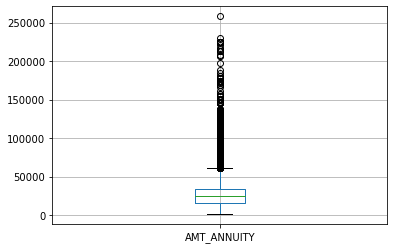

In [16]:
# AMT_ANNUITY is continuous variable, so checking outliers
application_data.boxplot(column=['AMT_ANNUITY'])
plt.show()

 From box plot, it seems, it has lots of outliers, let's find median
 
 application_data.AMT_ANNUITY.median()
- We can impute missing value from 24903 median.

In [18]:
# AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

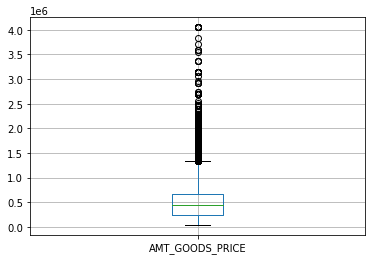

In [20]:
# Check outlier from box plot
application_data.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

 From box plot, it seems, it has lots of outliers, let's find median
    
application_data.AMT_GOODS_PRICE.median()
- We can impute missing value from 450000 median.

In [22]:
#NAME_TYPE_SUITE

application_data.NAME_TYPE_SUITE.head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [23]:

application_data.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

 Since it's categorical value hence consider mode measure to impute missing values.
    
application_data.NAME_TYPE_SUITE.mode()
- considering the value to be imputed is - Unaccompanied

In [25]:
# CNT_FAM_MEMBERS

application_data.CNT_FAM_MEMBERS.head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [26]:
application_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

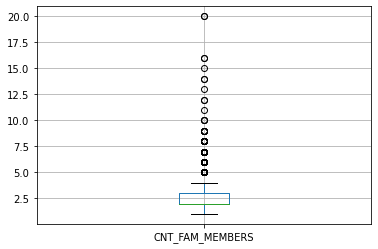

In [27]:
# check outlier from box plot

application_data.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()

 From box plot, it seems, it has lots of outliers, let's find median
    
application_data.CNT_FAM_MEMBERS.median()
- We can impute missing value by using 2.0 median.

In [29]:
#EXT_SOURCE_2
application_data.EXT_SOURCE_2.head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [30]:
application_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

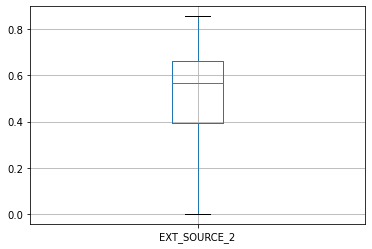

In [31]:
#EXT_SOURCE_2 is a continuous variable. So checking for outliers
application_data.boxplot(column=['EXT_SOURCE_2'])
plt.show()


Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51 

- ### Checking the datatypes of all the columns

In [140]:
application_data.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE                object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                   object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int32
DAYS_EMPLOYED                    float64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                  float64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE

In [33]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
application_data.nunique().sort_values() # finding count of unqiue values in each columns.

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

#### In the cells shown below we have Changed the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which had negative or mixed values and imputed them with absolute values for our analysis.

In [35]:
application_data['DAYS_BIRTH'].unique()


array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [36]:
application_data['DAYS_EMPLOYED'].unique()


array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [37]:
application_data['DAYS_REGISTRATION'].unique()


array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [38]:
application_data['DAYS_ID_PUBLISH'].unique()


array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [39]:
application_data['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [40]:
## filter  'columns starting with DAYS'

filter_col = [col for col in application_data if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [41]:
# Appling abs function on columns which start with 'DAYS' to change negative value to positive value
application_data[filter_col]= abs(application_data[filter_col])


In [42]:
application_data[filter_col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0,273.0
307507,20775.0,365243.0,4388.0,4090.0,0.0
307508,14966.0,7921.0,6737.0,5150.0,1909.0
307509,11961.0,4786.0,2562.0,931.0,322.0


In [43]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [45]:
# As per por observe there is XNA value in 'CODE_GENDER & 'ORGANIZATION_TYPE'

application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- ####  Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [46]:
application_data.CODE_GENDER.mode()

0    F
dtype: object

In [47]:
# Replacing XNA value with F, imputing with mode value.

application_data.loc[application_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [48]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- #### Imputing the value XNA which means not avilable in the column ''ORGANIZATION_TYPE'



In [49]:
application_data =application_data.replace('XNA', np.NAN)

In [50]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

- #### Conversion  of column intiger to categorical


In [51]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### 4. For numerical columns check for outliers and report them for at-least 5 variables. Added
### observations and reasoning.

In [52]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#REGION_POPULATION_RELATIVE
application_data.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

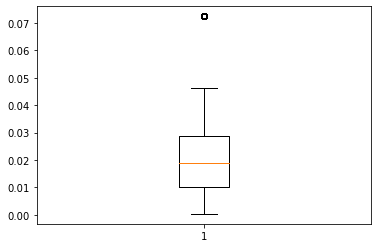

IQR:0.018657
Lowerwhisker:-0.017979500000000002
upperwhisker:0.056648500000000004
Population relative count greater than 0.056648500000000004 is considered to be an outlier


In [54]:
#REGION_POPULATION_RELATIVE
plt.boxplot(application_data.REGION_POPULATION_RELATIVE)
plt.show()

Q1 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.75)

IQR = Q3 - Q1 # method to find IQR value

Lowerwhisker =(Q1 - 1.5*IQR) # Method to find Lower whisker value
upperwhisker =(Q3 + 1.5*IQR) # Method to find upper whisker value


print('IQR:{}'.format(IQR))

print("Lowerwhisker:{}".format(Lowerwhisker))

print("upperwhisker:{}".format(upperwhisker))


# From box plot, observed that there are above upper whisker(maximum), consider to be outliers.
# The above whiskder & lower whisker consider as outliers.

'''according to statistics the the values less than lower whisker value -0.017979500000000002 considered as outlier, 
   as people relative cannot be negative we consider count greater than  0.056648500000000004 as an outlier.'''

print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))


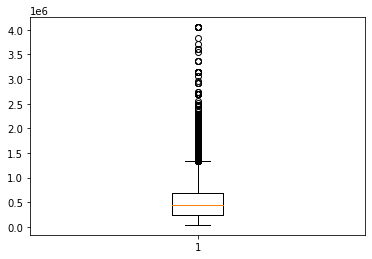

IQR:0.018657
Lowerwhisker:-0.017979500000000002
upperwhisker:0.056648500000000004
Population relative count greater than 0.056648500000000004 is considered to be an outlier


In [55]:
#AMT_GOODS_PRICE
data=application_data['AMT_GOODS_PRICE']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

Q1 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.75)

IQR = Q3 - Q1

Lowerwhisker =(Q1 - 1.5*IQR)
upperwhisker =(Q3 + 1.5*IQR)

print('IQR:{}'.format(IQR))

print("Lowerwhisker:{}".format(Lowerwhisker))

print("upperwhisker:{}".format(upperwhisker))

# As per the plot there is olny upper whisker so considered as outliers.

'''according to statistics the the values less than lower whisker value -423000.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  1341000.0 as an outlier.'''

print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))




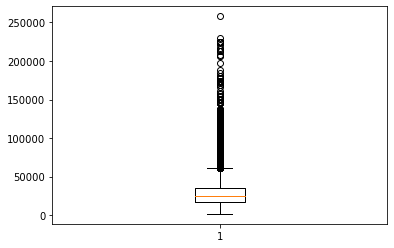

IQR:0.018657
Lowerwhisker:-0.017979500000000002
upperwhisker:0.056648500000000004
Population relative count greater than 0.056648500000000004 is considered to be an outlier


In [56]:
# AMT_ANNUITY
data = application_data.AMT_ANNUITY
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()


Q1 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = application_data['REGION_POPULATION_RELATIVE'].quantile(0.75)

IQR = Q3 - Q1

Lowerwhisker =(Q1 - 1.5*IQR)
upperwhisker =(Q3 + 1.5*IQR)


print('IQR:{}'.format(IQR))

print("Lowerwhisker:{}".format(Lowerwhisker))

print("upperwhisker:{}".format(upperwhisker))


# # As per the plot there is olny upper whisker so considered as outliers.
'''according to statistics the the values less than lower whisker value -10584.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  61704.0 as an outlier.'''
print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))

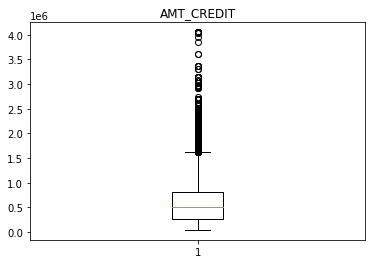

IQR:538650.0
Lowerwhisker:-537975.0
upperwhisker:1616625.0
The amount credited greater than 1616625.0 can be considered as an outlier


In [57]:
# AMT_CREDIT
plt.boxplot(application_data['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 

Q1 = application_data['AMT_CREDIT'].quantile(0.25)
Q3 = application_data['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)


print('IQR:{}'.format(IQR))

print("Lowerwhisker:{}".format(lowerwhisker))

print("upperwhisker:{}".format(upperwhisker))

# As per plot outliers are present only above the upper wisker so considering them as outliers
'''according to statistics the the values less than lower whisker value -537975.0 considered as outlier, 
   as credit amount cannot be negative we consider amount greater than  1616625.0 as an outlier.'''
print("The amount credited greater than {} can be considered as an outlier".format(upperwhisker))



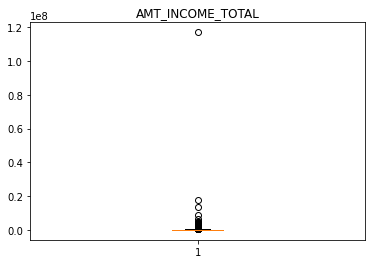

IQR:538650.0
Lowerwhisker:-537975.0
upperwhisker:1616625.0
The amount credited greater than 1616625.0 can be considered as an outlier


In [58]:
#AMT_INCOME_TOTAL

plt.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()

Q1 = application_data['AMT_CREDIT'].quantile(0.25)
Q3 = application_data['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)


print('IQR:{}'.format(IQR))

print("Lowerwhisker:{}".format(lowerwhisker))

print("upperwhisker:{}".format(upperwhisker))


# As per plot outliers are present only above the upper wisker so considering them as outliers
'''according to statistics the the values less than lower whisker value -537975.0 considered as outlier, 
   as credit amount cannot be negative we consider amount greater than  1616625.0 as an outlier.'''
print("The amount credited greater than {} can be considered as an outlier".format(upperwhisker))

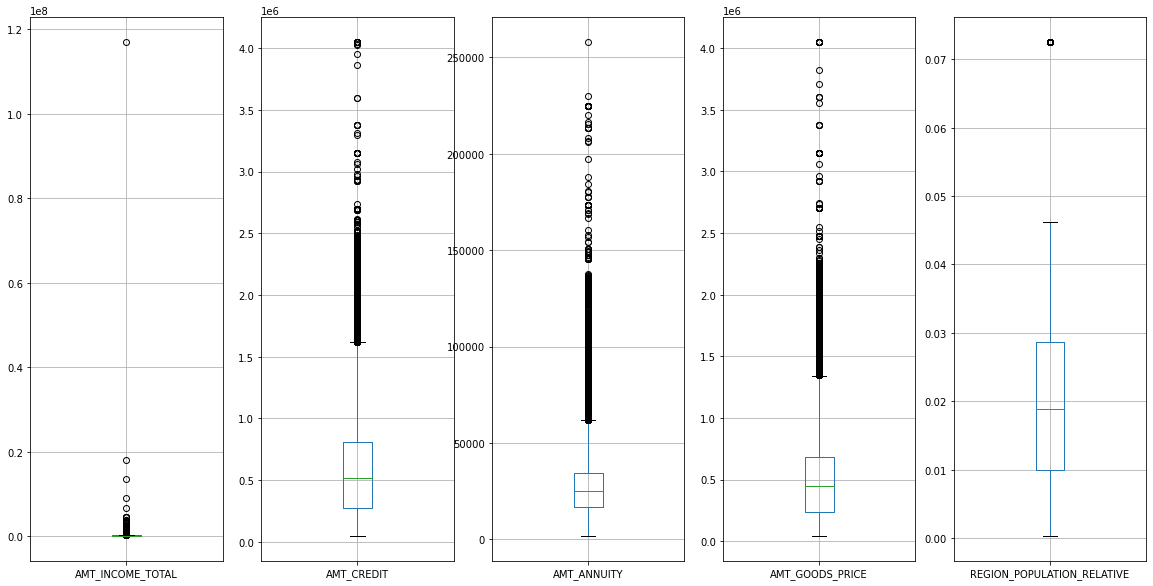

In [59]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    application_data.boxplot(column = col)
plt.show()


We observe that 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE' variables have huge outliers as we can see the spike at 100 percentile. So we will use 1.5 IQR rule to remove outliers

### 5. Binning variables for analysis

Binning of Continuous: (for atleast 2 variables):



#### *AMT_INCOME_TOTAL
#### *DAYS_BIRTH
#### *AMT_CREDIT


In [60]:
# Binning total income('AMT_INCOME_TOTAL') in 'AMT_INCOME_RANGE' based on quantiles  
application_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
application_data['AMT_INCOME_RANGE']=pd.qcut(application_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [62]:
application_data.AMT_INCOME_RANGE

0             High
1         VeryHigh
2          VeryLow
3           Medium
4           Medium
            ...   
307506      Medium
307507     VeryLow
307508      Medium
307509        High
307510      Medium
Name: AMT_INCOME_RANGE, Length: 307511, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [63]:
# Converting 'DAYS_BIRTH' to years
application_data['DAYS_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)

In [64]:
application_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [65]:
# Biining 'DAYS_BIRTH'
application_data['Age_group']=pd.cut(application_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [66]:
application_data.Age_group

0         Very_Young
1         Middle_Age
2         Middle_Age
3         Middle_Age
4         Middle_Age
             ...    
307506    Very_Young
307507    Middle_Age
307508    Middle_Age
307509         Young
307510    Middle_Age
Name: Age_group, Length: 307511, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [67]:
## Binning 'AMT_CREDIT_RANGE' by creating various ranges

application_data['AMT_CREDIT_RANGE'] = pd.qcut(application_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_data['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

### 6.  Analysis
* Choose a set of 20-30 columns, which makes sense to us.
* First Check the imbalance percentage: What percentage of rows are for Target as 1 or 0. It is imbalance data as it is not 50:50.
* Divide data in 2  dataframe sets:
   * set1: target is 1: difficulties to payback the laon(defaulter)
   * Set 2: Target is 0 : able to payback the loan(non-defaulter)

* Target is Need to use these dataframe to do univariate and bivariate data analysis
* Need to use these dataframe to do univariate and bivariate data analysis & to find Top correlated variables




### Checking for imbalance in Target

In [141]:
# Find percentage value of TARGET varibale
application_data.TARGET.value_counts(normalize=True)*100 

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

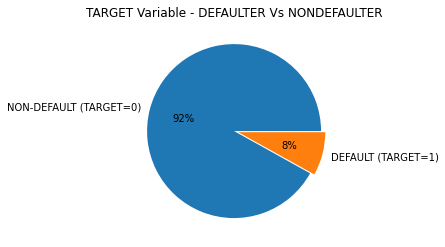

In [69]:
plt.pie(application_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

From above plot we clearly say that its imbalance b/w defaulter & non-nodefaulter. 92% of people didn't default as opposed to 8% who defaulted. 

In [70]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,Age_group,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Very_Young,LOW
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,Middle_Age,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,Middle_Age,VERY_LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Middle_Age,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Middle_Age,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,

In [71]:
# Divide the data into two sets, i.e., Target-1 and Target-0
application_data_1 = application_data[application_data['TARGET']==1]
application_data_0 = application_data[application_data['TARGET']==0]

### Performing univariate analysis

- #### Perfeorming analysis for one column at a time &  univariate analysis for categoriacal variables for both 0 and 1

#### Education

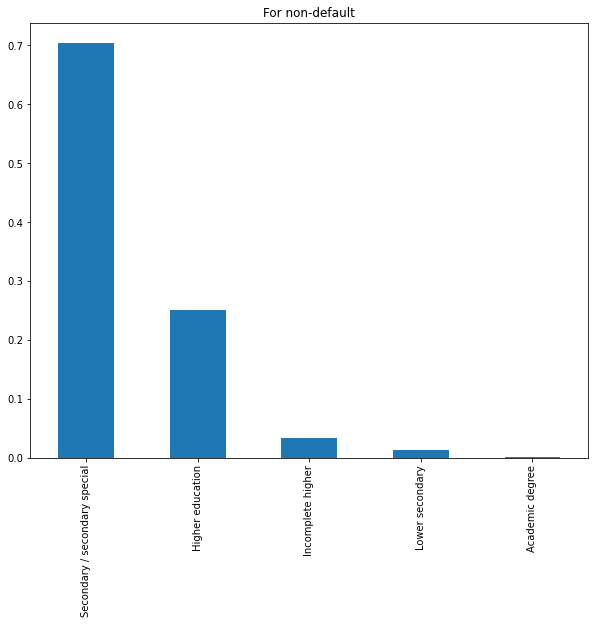

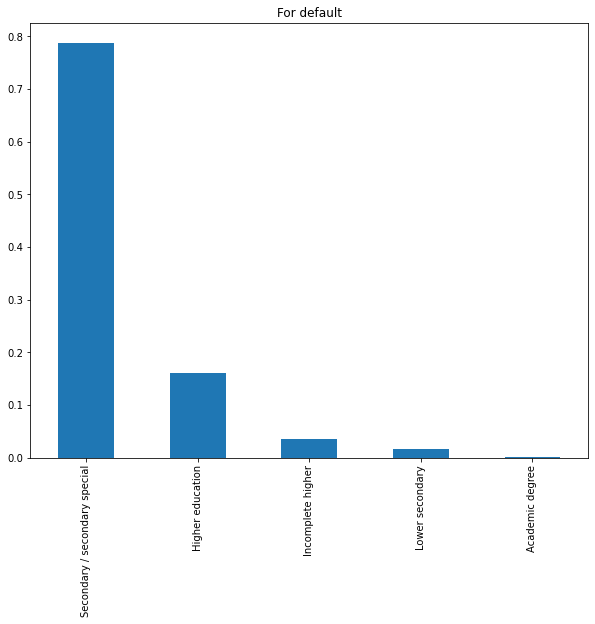

In [72]:
# NAME_EDUCATION_TYPE(categorical ordered variable)



# for Target=0
plt.figure(figsize=(10,8)) 

application_data_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('For non-defaulter')
plt.show()
# for Target=1

plt.figure(figsize=(10,8)) 

application_data_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('For defaulter')
plt.show()

Inference 
- From the plot Above, we can conclude that in both case secondary/special educated people are applying loans in high in number.
- Academic degree educated pepole applying loan in very less number.

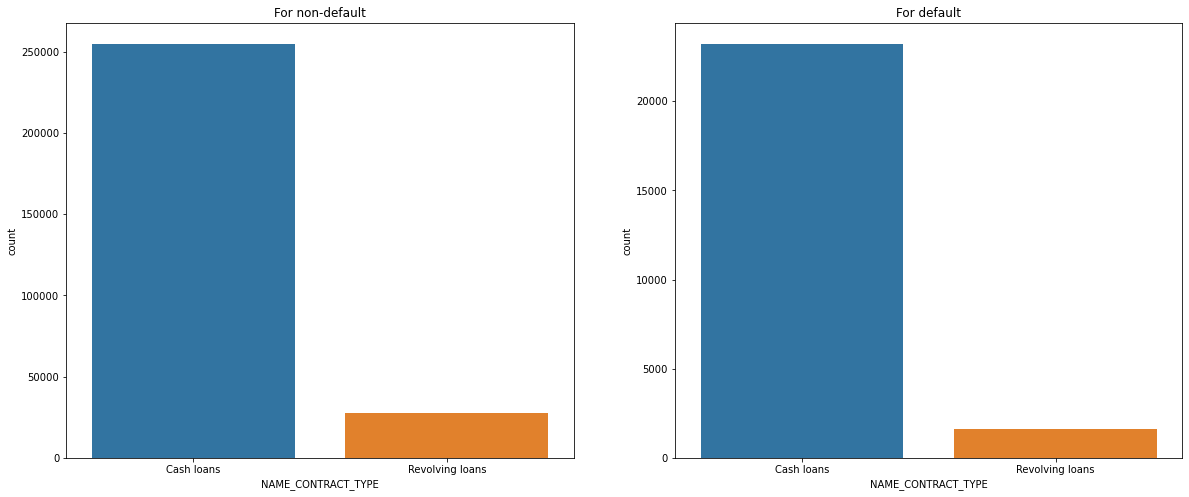

In [74]:
#NAME_CONTRACT_TYPE

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_CONTRACT_TYPE'])
plt.title('For non-defaulter')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_CONTRACT_TYPE'])
plt.title('For defaulter')
plt.show()

Inference

- From the above plot We can observe that cash loans are prefferred by both Loan Payment Difficulties and 
Loan-Non Payment Difficulties
- There is a decrease in the percentage of Payment Difficulties 
who opt for revolving loans.

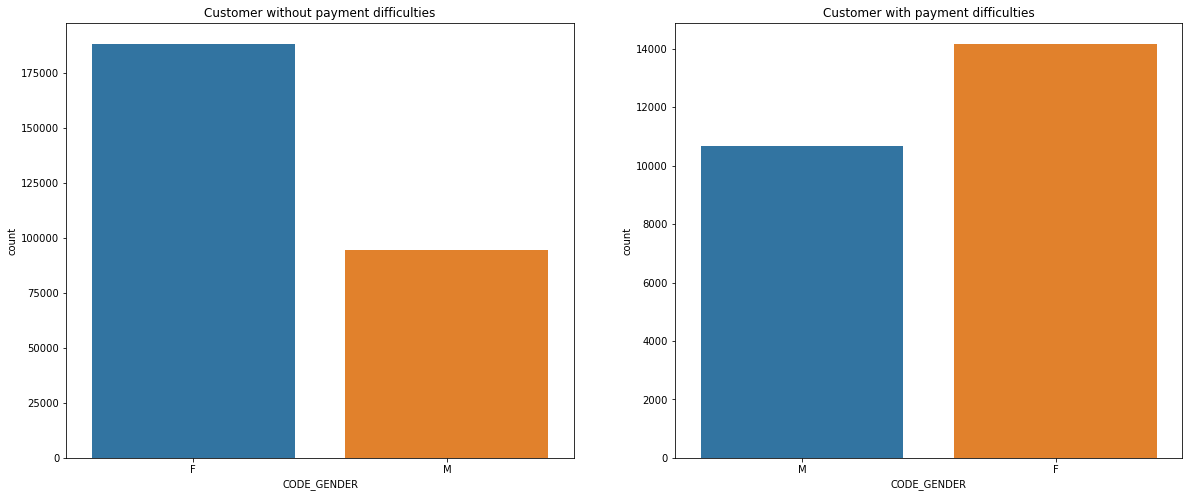

In [75]:
#CODE_GENDER

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['CODE_GENDER'])
plt.title('For non-defaulter')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['CODE_GENDER'])
plt.title('For defaulter')
plt.show()

Inference

- From the above plot Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender,
- we observe that Females are the majority in both the cases 
- Although there is an increase in the percentage in Male Payment Difficulties from Non-defaulter to defaulter.

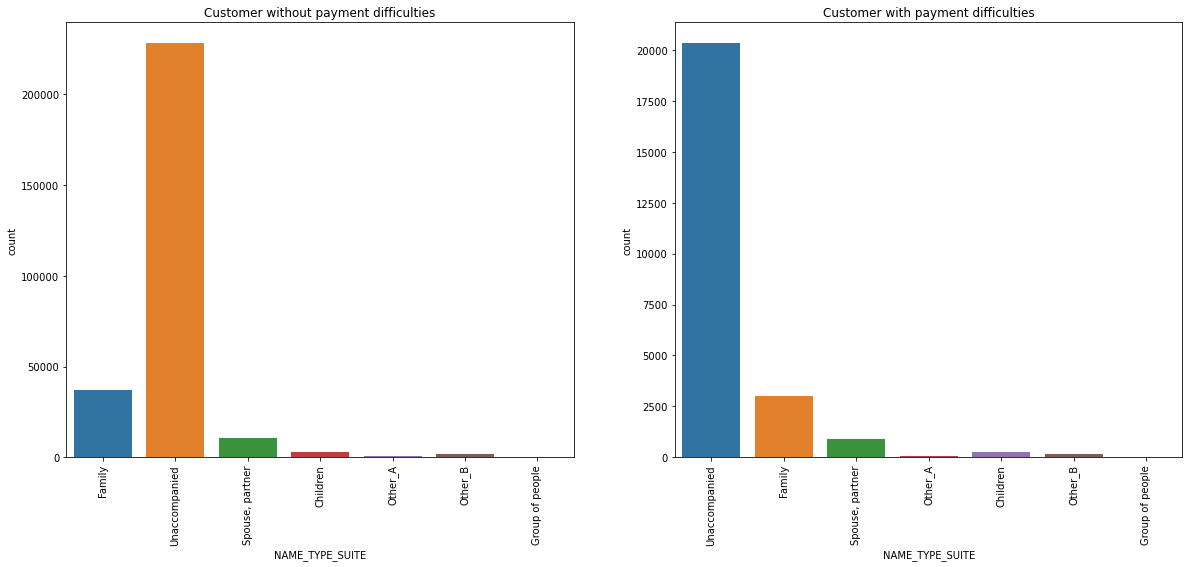

In [76]:
#NAME_TYPE_SUITE

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_TYPE_SUITE'])
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_TYPE_SUITE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

Inference

- For the above plot we observe that the percentage of unaccompanied peolpe is higher.

 

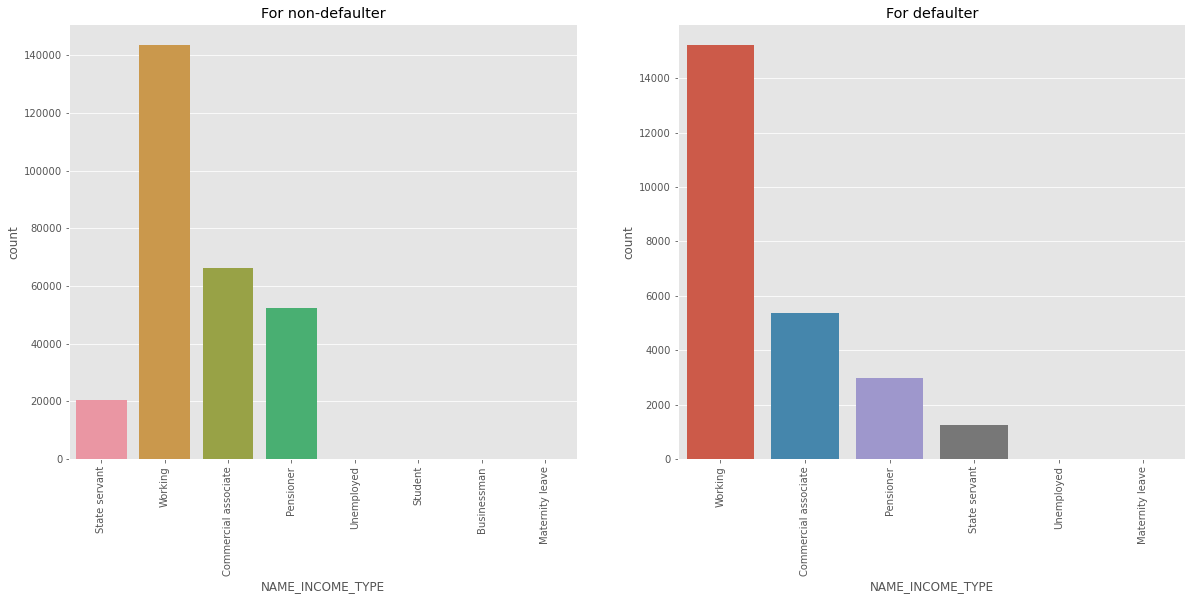

In [145]:
#NAME_INCOME_TYPE

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.title('For non-defaulter')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.title('For defaulter')
plt.show()

Inference

- For the above plot we observe that decrease the payment difficulties who are Pensioner & increase the percentage of payment difficulties who are working, compare the both Payment with difficulties & non-difficulties.


#### Education


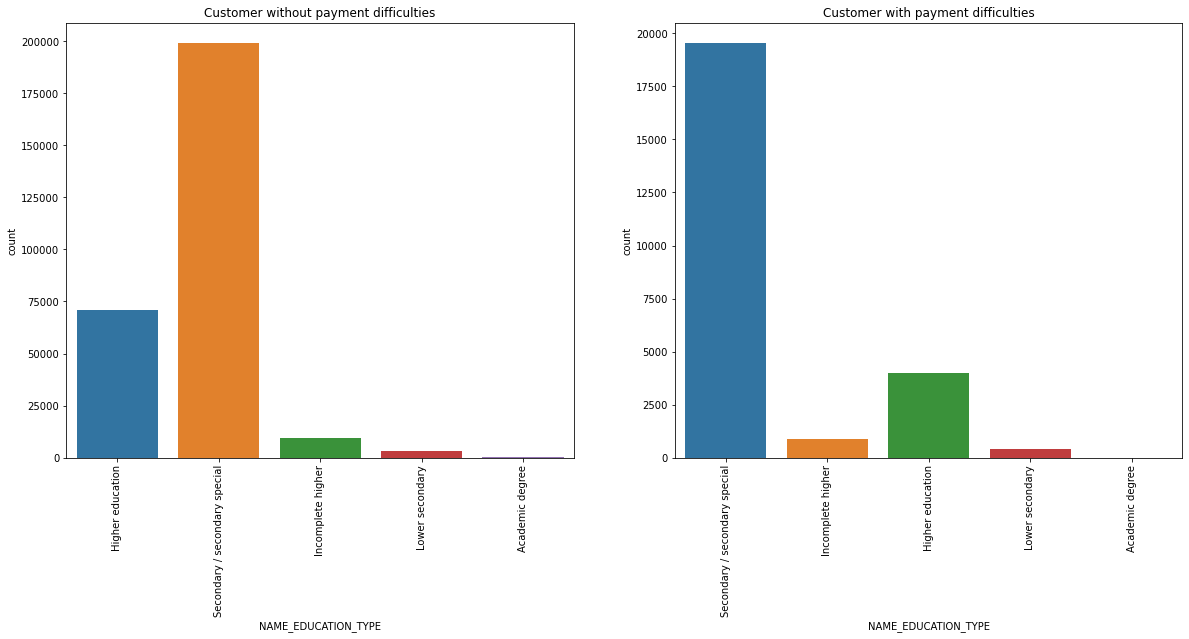

In [78]:
#NAME_EDUCATION_TYPE


# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

Inference

- Form the above ploat we oberve that in both case the percentage of secondary/special educated people appliying loan higher in number.
- Where Academic educted people applying loan in least in number.

#### Status

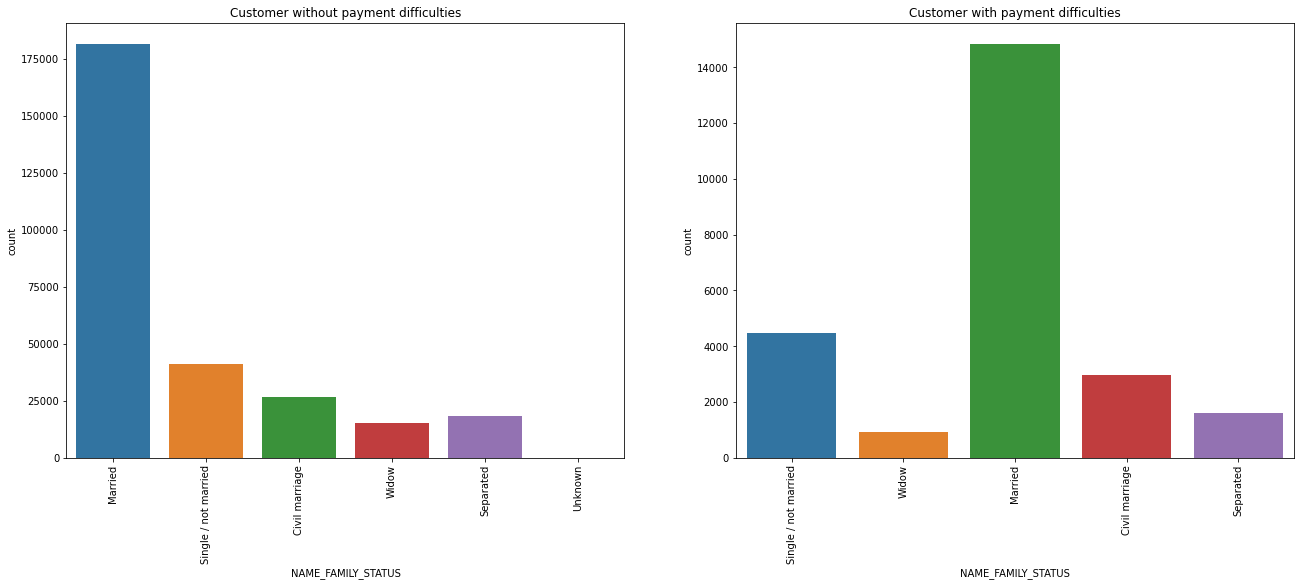

In [79]:
#NAME_FAMILY_STATUS

# for Target=0
plt.figure(figsize=(22,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

Inference

- For the above plot we observe that the married people tend to take more Loan as compared to other categories.
-  Being married is not impacting default and not defaulting

#### Housing

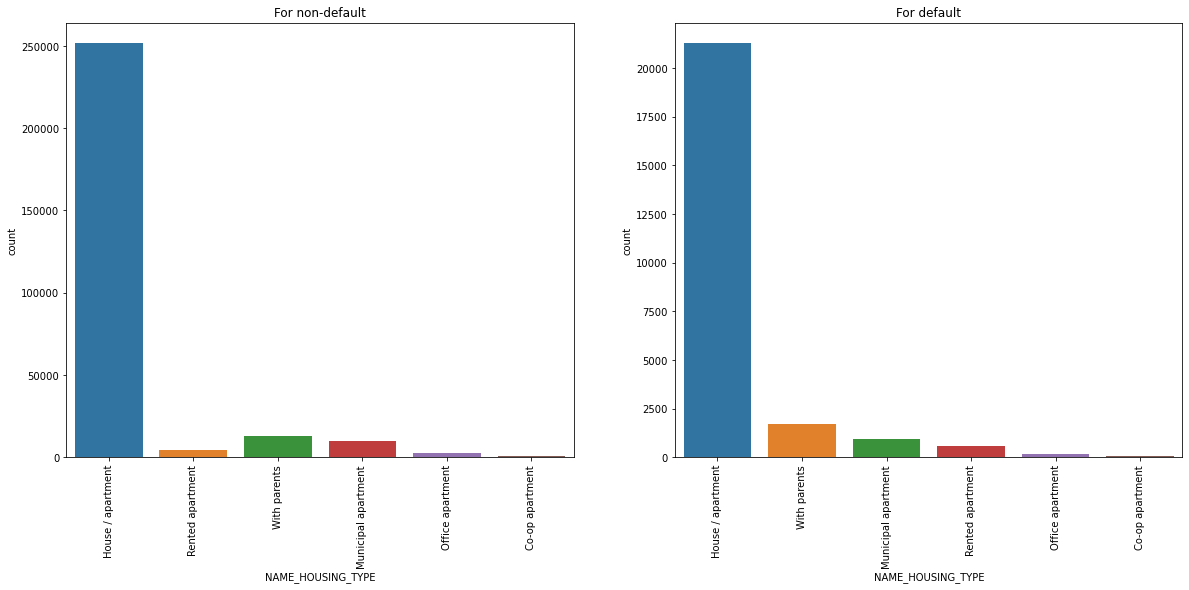

In [80]:
#NAME_HOUSING_TYPE

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)

plt.title('For non-default')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)

plt.title('For default')
plt.show()

Inference

- From above plot we can conclude that there exists people who have own house lies in both default and non default.
- Observe that  an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

 #### Occupation

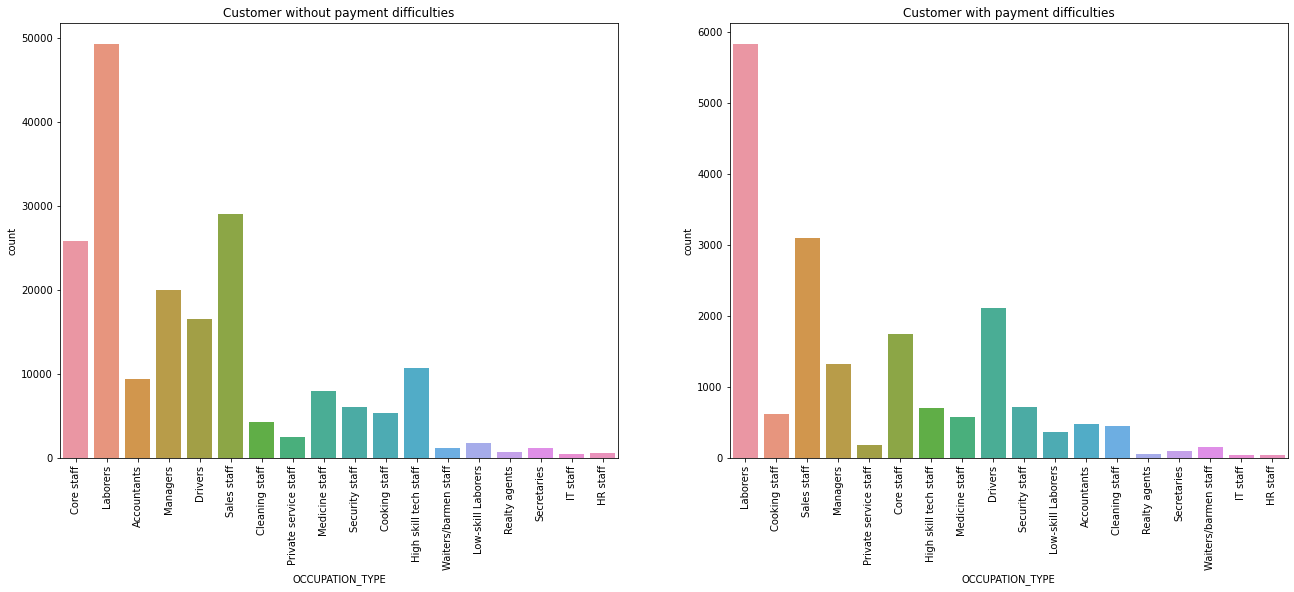

In [81]:
#OCCUPATION_TYPE

# for Target=0
plt.figure(figsize=(22,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

Inference

 - From above plot we observe that Labourers having more difficulties to paying loan and IT staff having least difficulties to paying the loan, compare both case

#### Day of Week

Text(0.5, 1.0, 'For default')

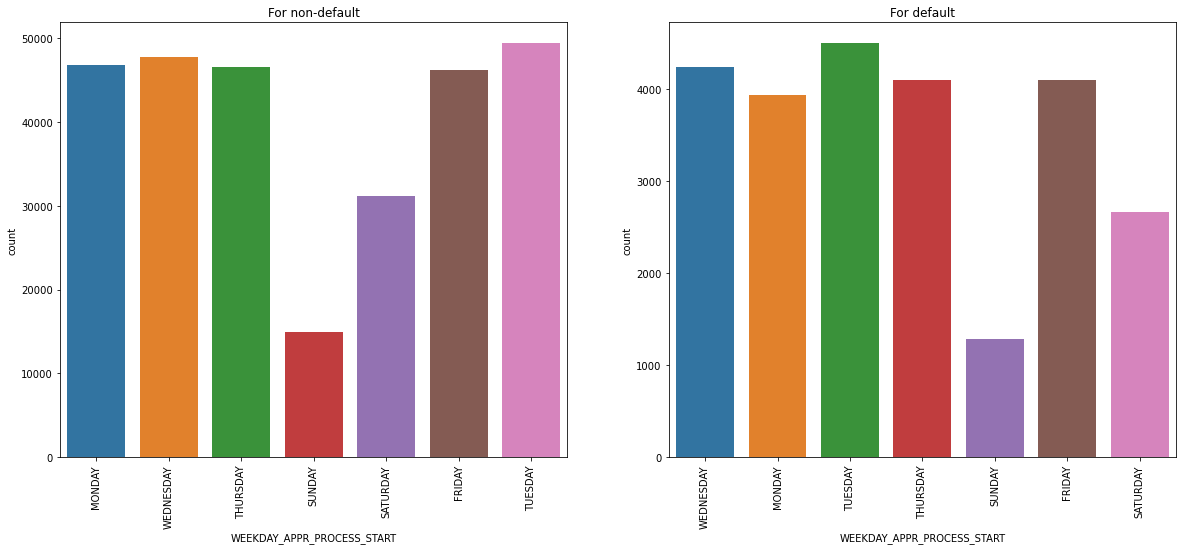

In [82]:
#WEEKDAY_APPR_PROCESS_START

# for Target=0
# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['WEEKDAY_APPR_PROCESS_START'])
plt.xticks(rotation=90)

plt.title('For non-default')

# for Target=1

plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['WEEKDAY_APPR_PROCESS_START'])
plt.xticks(rotation=90)

plt.title('For default')

Inference

- From above plot we observe that there are very less applicant who applied loan in weekends, in both case. 

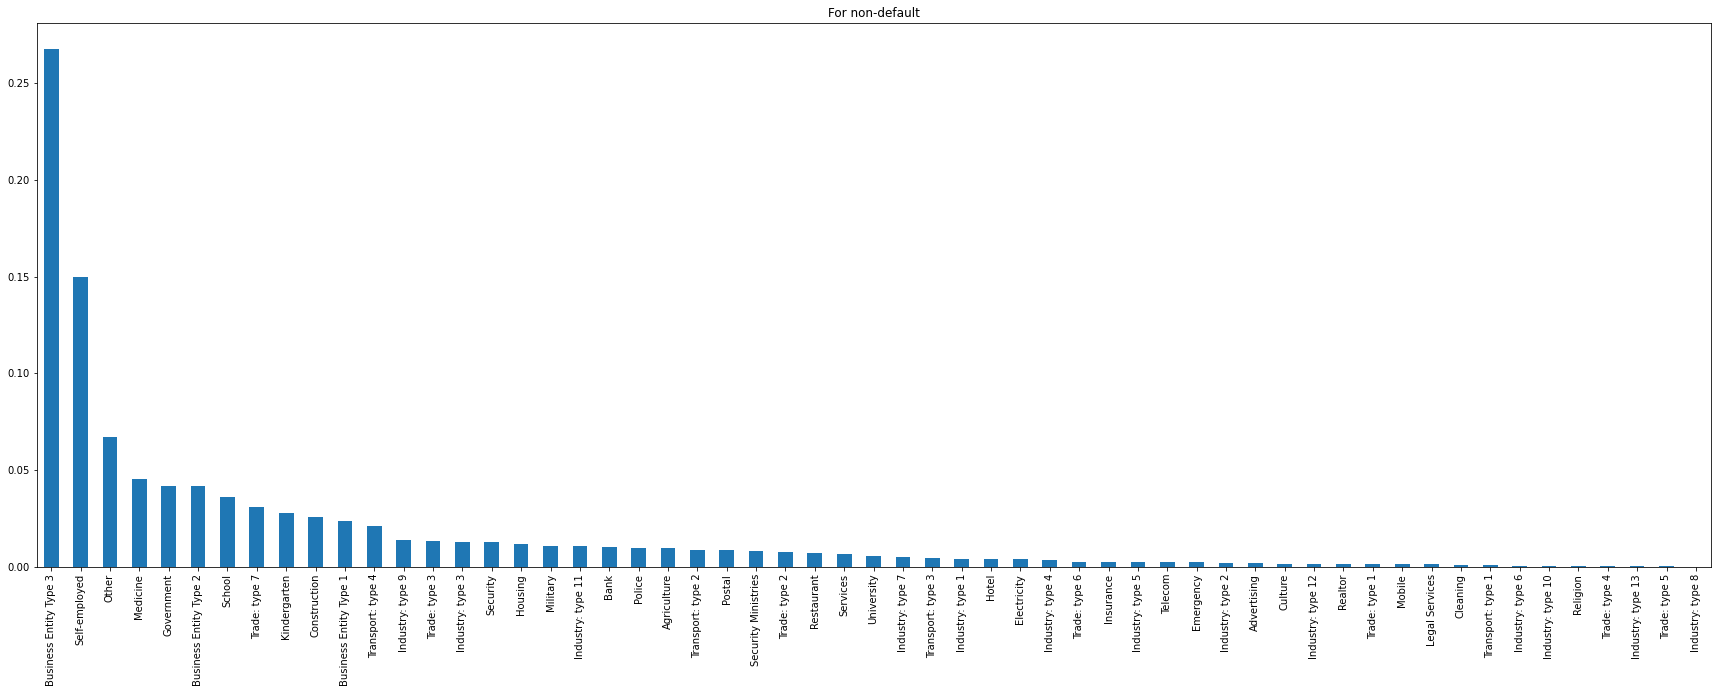

In [83]:
#ORGANIZATION_TYPE

# for Target=0
plt.figure(figsize=(30,10)) 

application_data_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title('For non-default')
plt.show()


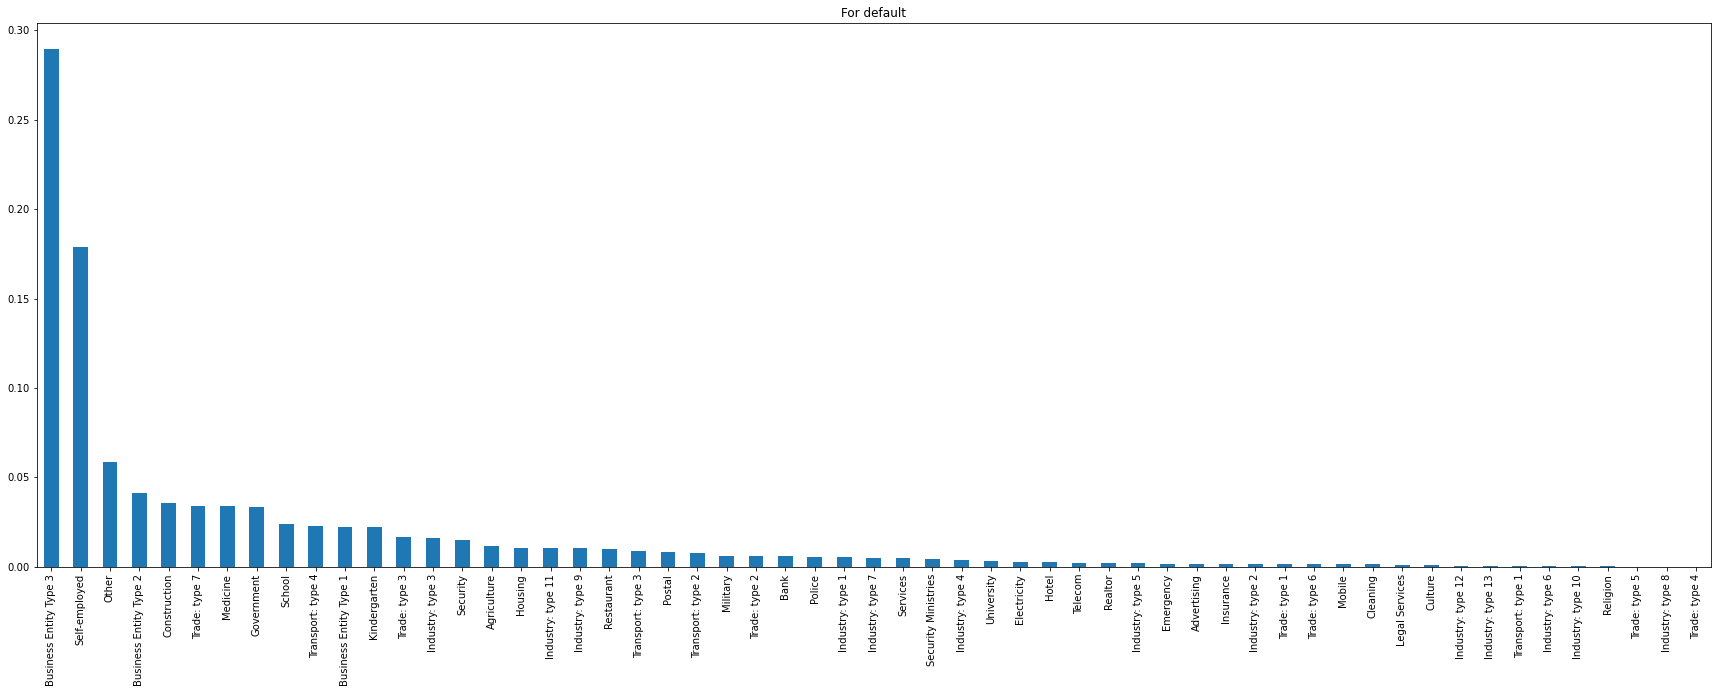

In [84]:
#For target 1

plt.figure(figsize=(30,10)) 

application_data_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title('For default')
plt.show()


Inference

- From the above plots we observe that most of the customer belong from 'Business Entey Type3' in both case

#### Source of income range

<Figure size 1440x576 with 0 Axes>

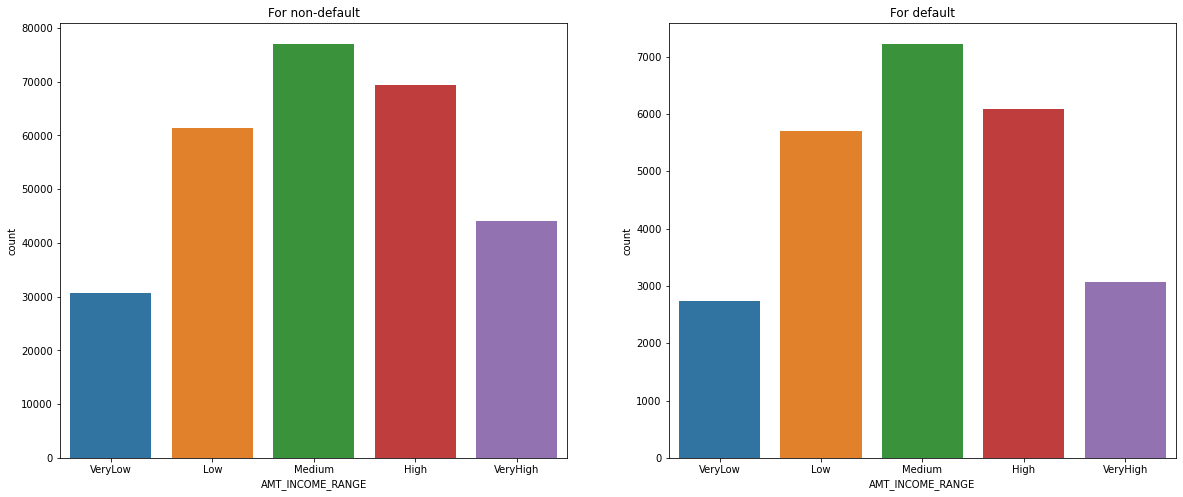

In [85]:
#AMT_INCOME_RANGE

plt.figure(figsize=(20,8)) 

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['AMT_INCOME_RANGE'])
plt.title('For non-default')

# for Target=1
plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['AMT_INCOME_RANGE'])
plt.title('For default')
plt.show()

Inferences:
    
- From the above plot we can say that Medium income range customer have more payment difficulties in both case

#### Age phase

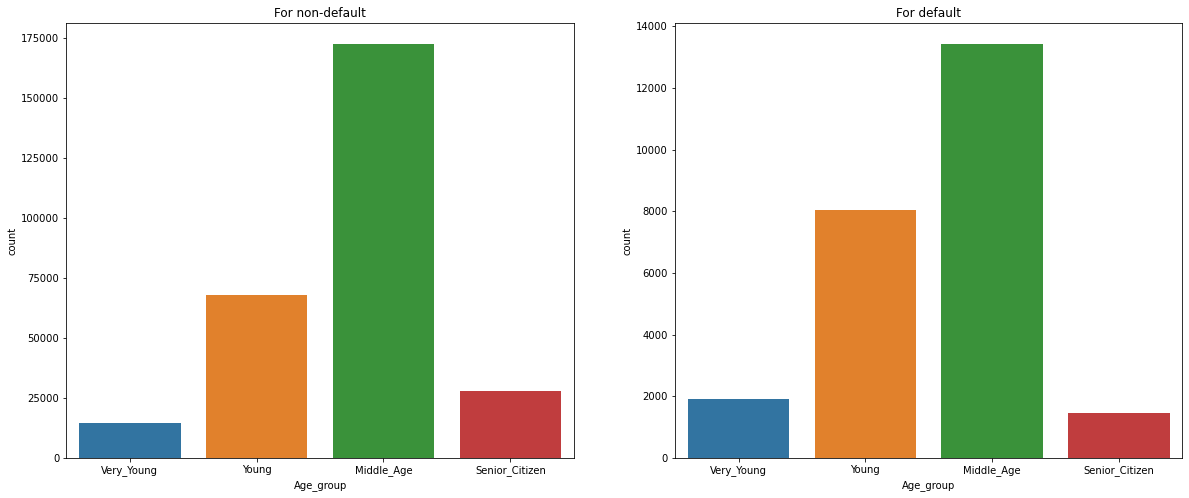

In [86]:
#Age_group

# for Target=0
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(application_data_0['Age_group'])
plt.title('For non-default')

# for Target=1

plt.subplot(1,2,2)
ax = sns.countplot(application_data_1['Age_group'])
plt.title('For default')
plt.show()

Inferences:

- From the above plots we can say that applying loan major who have in middle age.
- The percentage of payment difficulties decreas in Senior Citzen phase and increase in Middle age when compare both case.
    

In [88]:
# Compare the target variable across the categories of categorical variables against Target 0 and 1

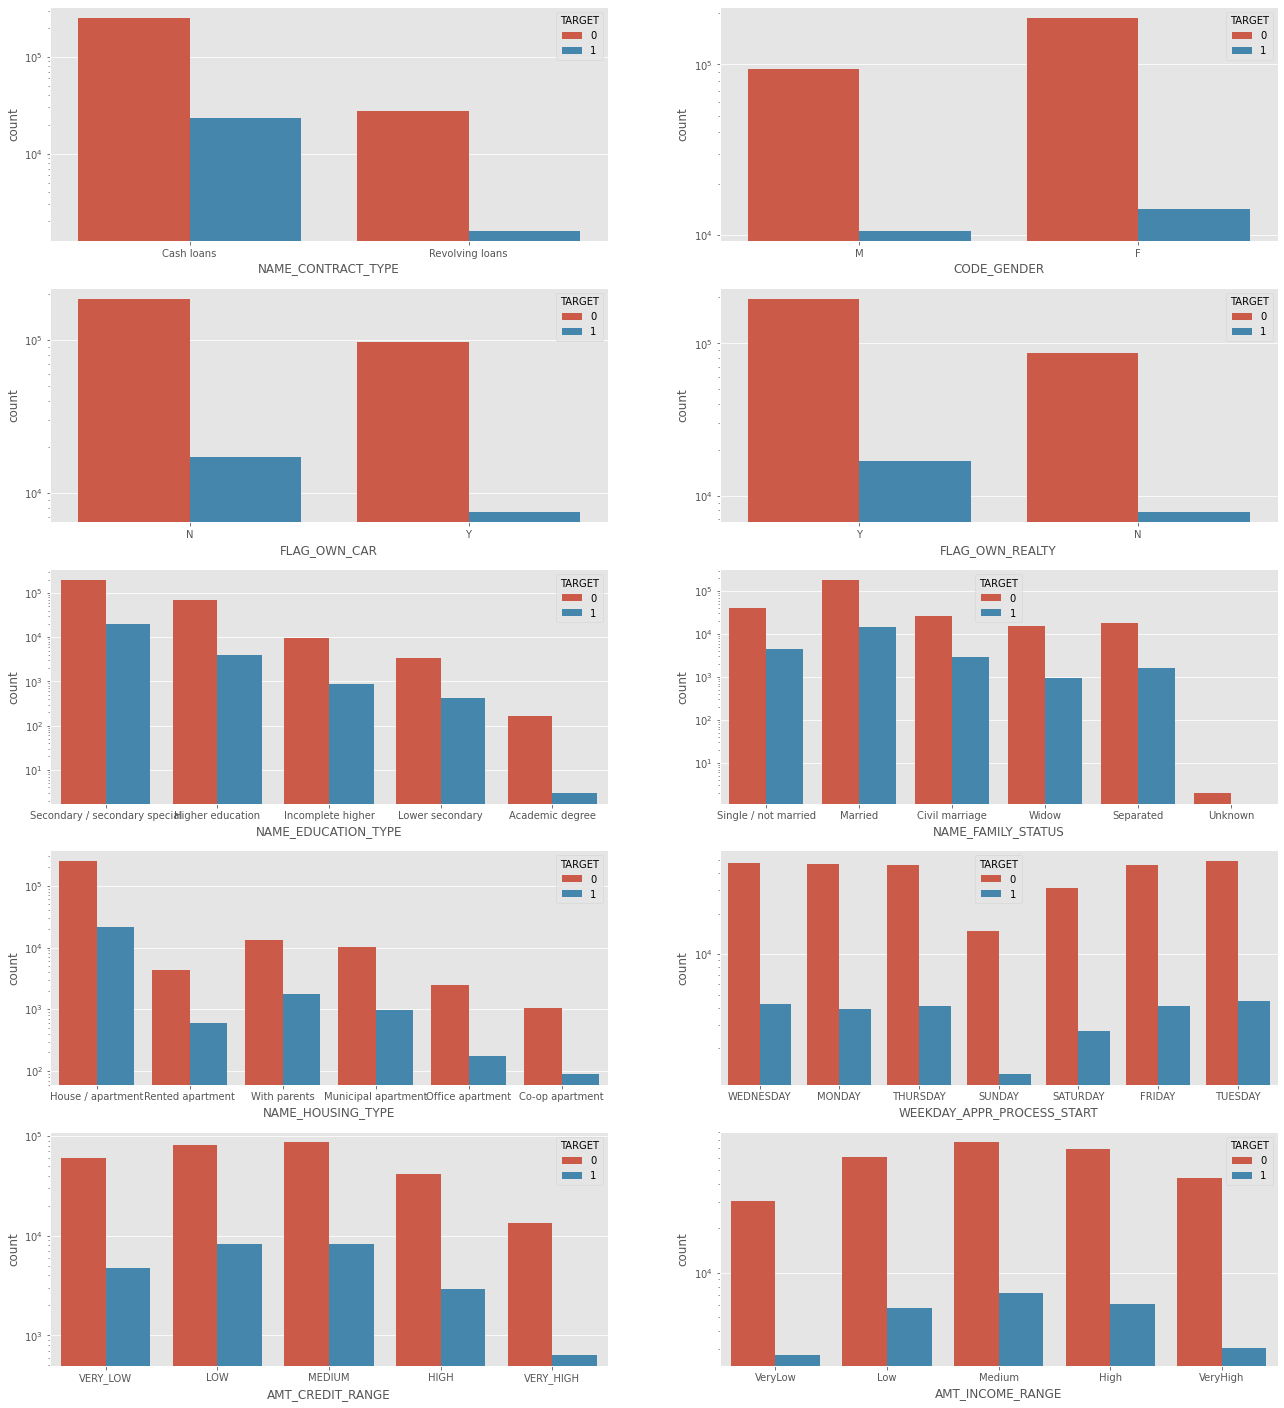

In [143]:
#considering 10 categorical columns
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_RANGE','AMT_INCOME_RANGE']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=application_data)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()
#the XNA in Code_gender is not known if it is NA or a category so leaving it as it is.

Insights


- People with Medium total income are more likely to default
- People with high Credit amount are less likely to default
- People who started application process on sunday are less likely to default
- Saturday and sunday are less busy for bank in terms of loan applications
- People with house or appartment tend to take more loans
- We can say more married people tend to take more Loan as compaired to other categories
- we can conclude that secondary/special educated people are applying loans in high in number
- People with real estate tends to take more loans
- People who don't own a car tends to take more loans
- Female tends to take more loans
- People tend to take more cash loans, and default percentage of revolving loans is less

### Univariate continuous variable analysis

In [90]:

def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=application_data_0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=application_data_1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

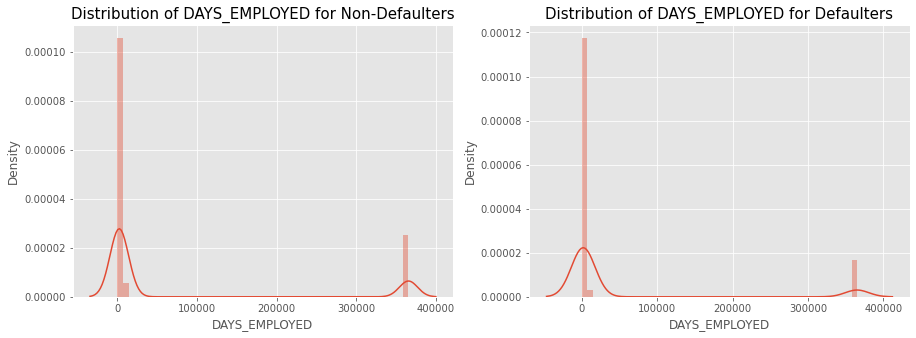

In [91]:
plotunidist('DAYS_EMPLOYED')

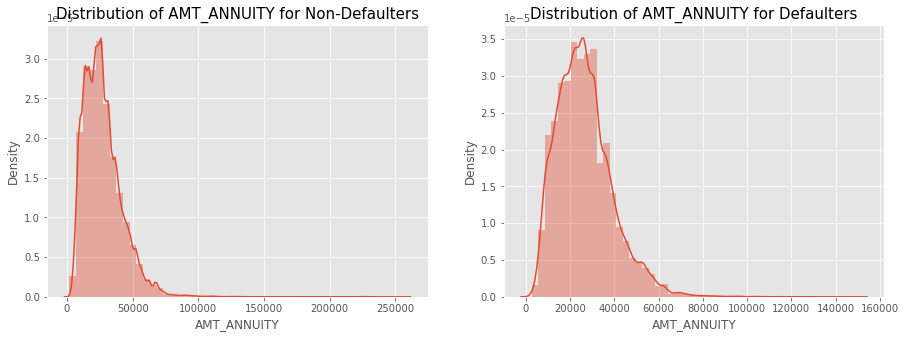

In [92]:
plotunidist('AMT_ANNUITY')

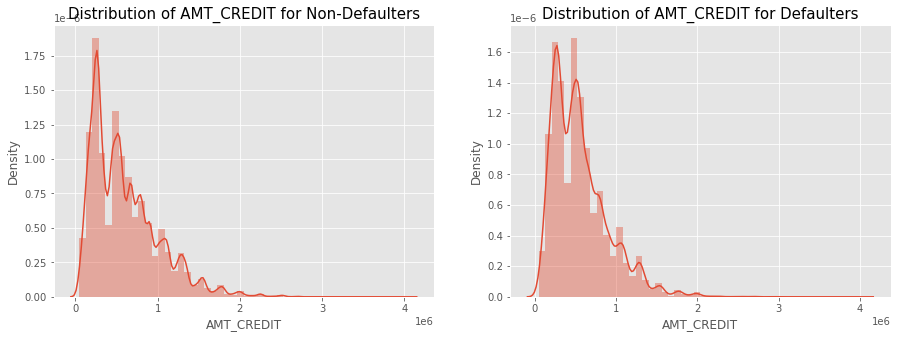

In [93]:
plotunidist('AMT_CREDIT')

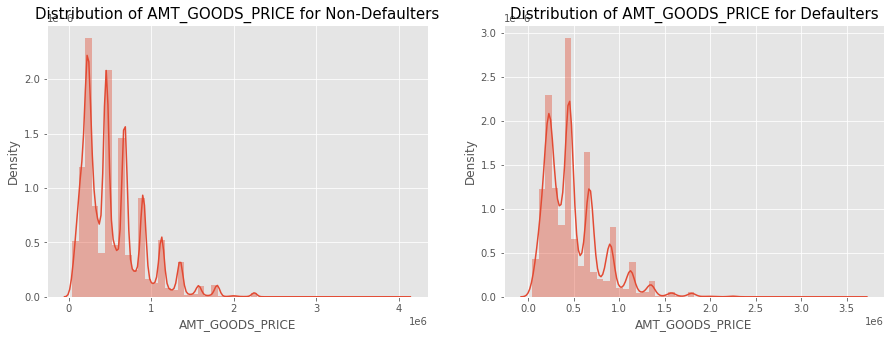

In [94]:
plotunidist('AMT_GOODS_PRICE')

In [95]:
application_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

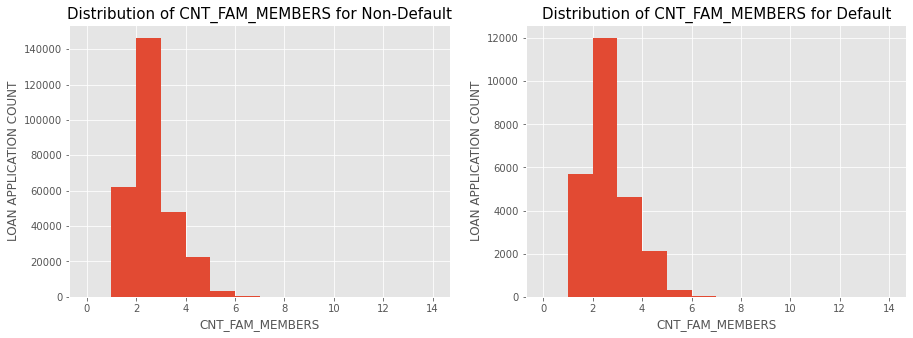

In [96]:

plt.figure(figsize=(15,5))

#For Target 0
plt.subplot(1, 2, 1)
application_data_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Default',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

#For Target 1
plt.subplot(1, 2, 2)
application_data_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Default',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

### Compare the target variable across the numerical variables against Target 0 and 1



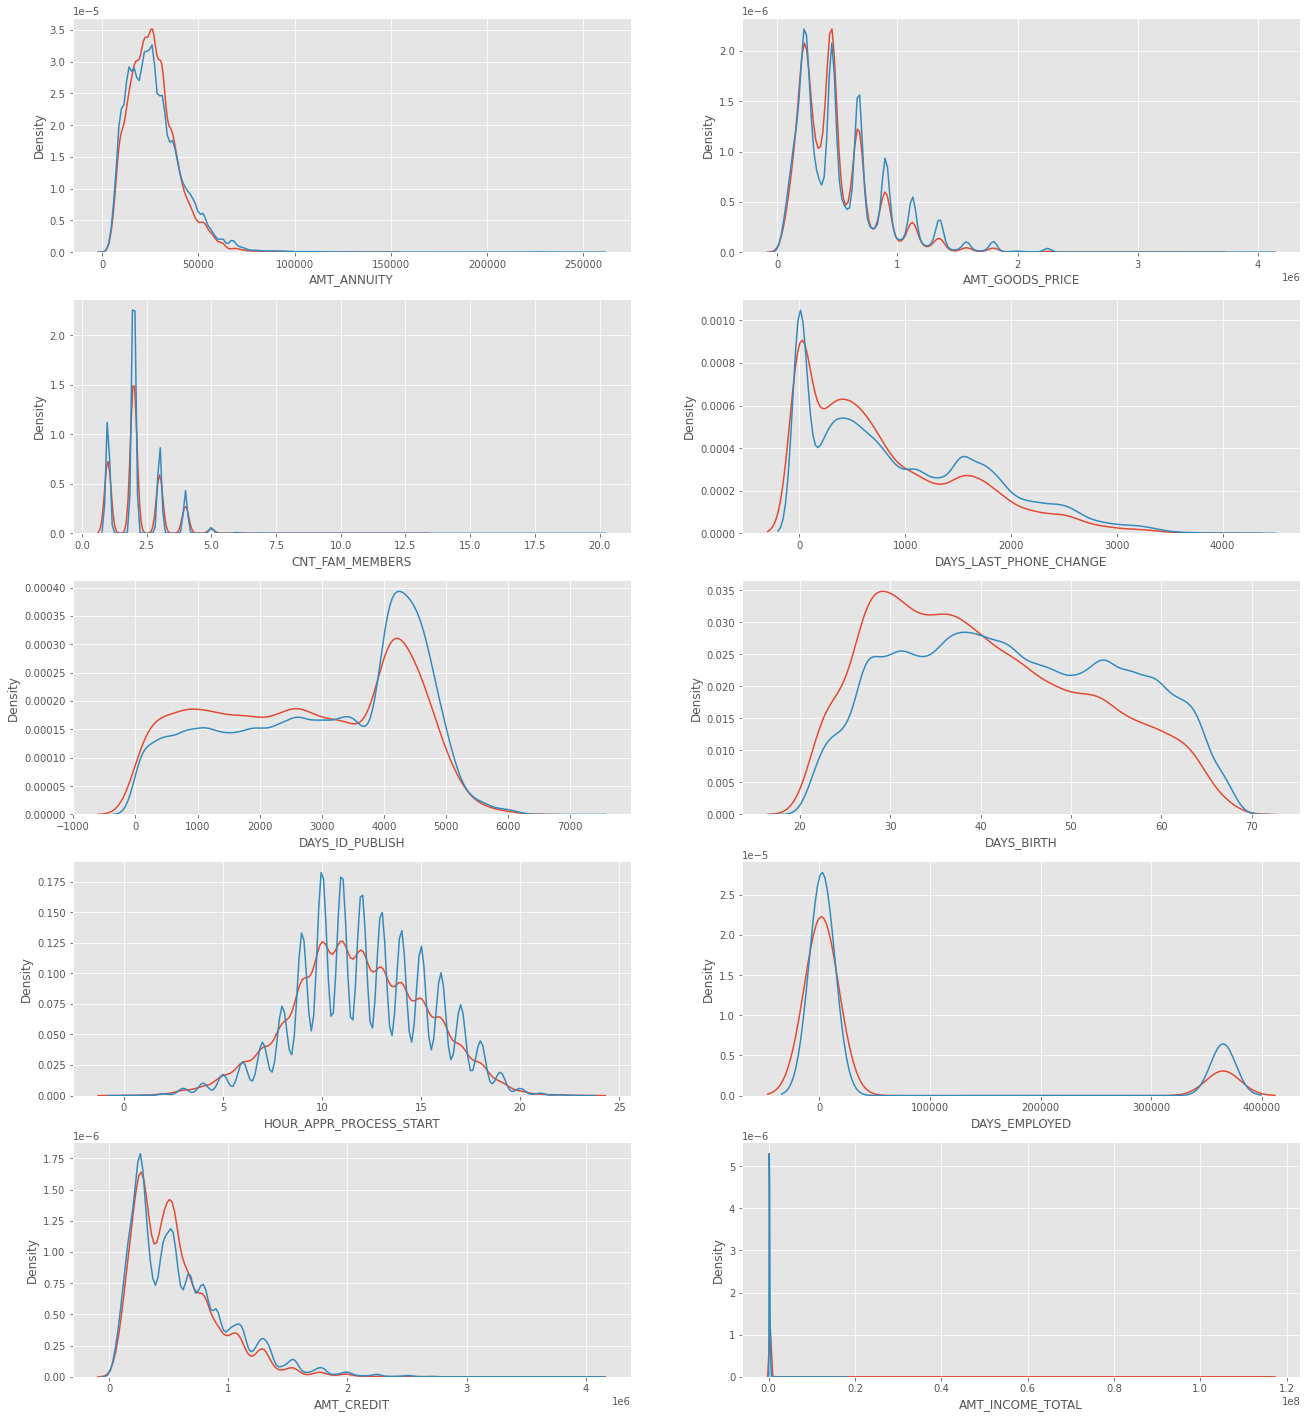

In [97]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(application_data_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(application_data_0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()    

In [ ]:
Insights

- People with lower total income are more likely to default
- People who just got employed tends to take more loans
- People who retired tends to take more loans
- High number of applications are filed in 10 AM to 2 PM
- People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans
- People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans
- nuclear family tends to take more loans
- for less goods amount people take loans
- low amount annuity has high number of loans

### Correlation

Finding correlation for numerical column for both cases of target column



In [98]:
#Getting the top 10 correlation in application_data_0 & application_data_1

# for target=0

corr=application_data_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']

corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()

corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)

corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018,0.997018
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582,0.993582
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988153,0.988153
412,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603,0.985603
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032,0.971032
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064,0.962064
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149


Observation

Target=0

 Major portion of decision is taken by-
(FLOORSMAX_MEDI AND FLOORSMAX_AVG)

(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)

(FLOORSMAX_MEDI AND FLOORSMAX_MODE)


In [99]:
# for target variable=1

corr=application_data_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']

corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()

corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)

corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187,0.997187
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124,0.996124
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195,0.989195
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594,0.986594
412,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466,0.980466
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073,0.978073
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637


Observation

Target=1

major portion of decision is taken by-

(YEARS_BEGINEXPLUATATION_MEDI AND YEARS_BEGINEXPLUATATION_AVG)

(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)

(FLOORSMAX_MEDI AND FLOORSMAX_AVG)

### Bivariate Analysis 

In [144]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,Age_group,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Very_Young,LOW
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,Middle_Age,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,Middle_Age,VERY_LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Middle_Age,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Middle_Age,LOW


#### Numerical-Numerical bivariate analysis


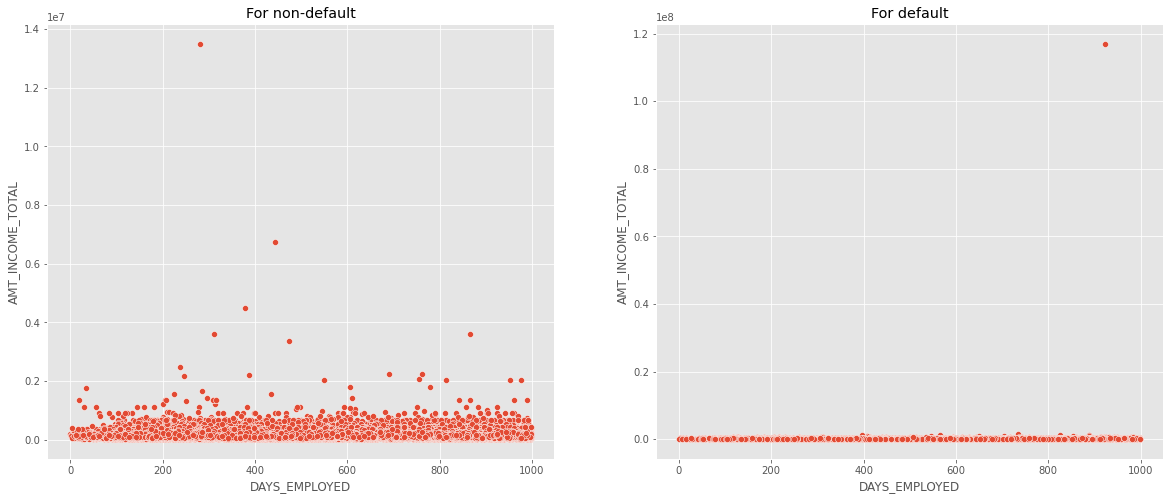

In [100]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=application_data_0[application_data_0['DAYS_EMPLOYED']<1000], x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('For non-default')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=application_data_1[application_data_1['DAYS_EMPLOYED']<1000], x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('For default')
plt.show()

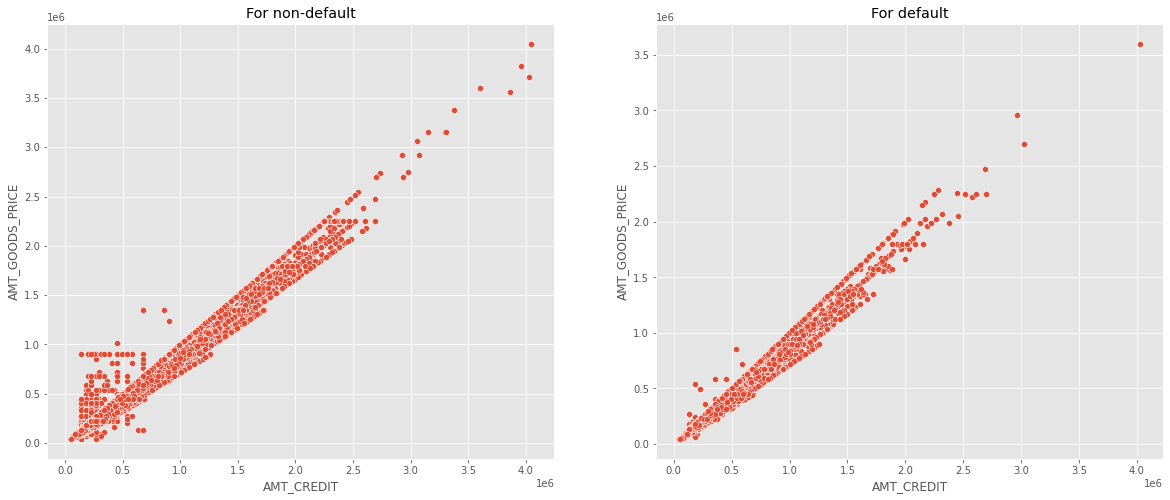

In [101]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=application_data_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('For non-default')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=application_data_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('For default')

plt.show()


Inference:

- we can see that goods price is positively correlated with credit amount.


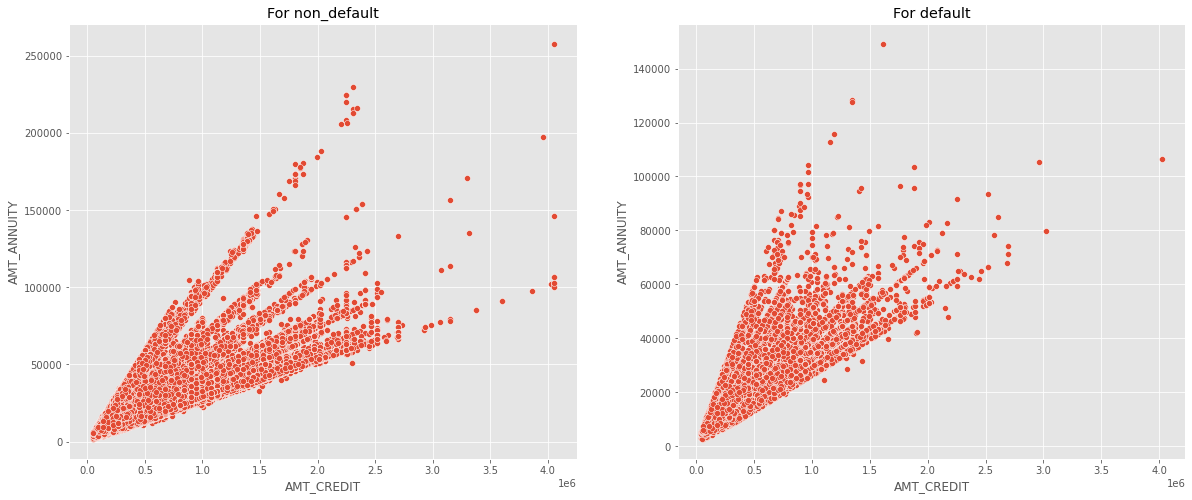

In [102]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=application_data_0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('For non_default')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=application_data_1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('For default')

plt.show()

People without payment difficulties take more credit for the annuity that they have

#### categorical - categorical bivariate analysis


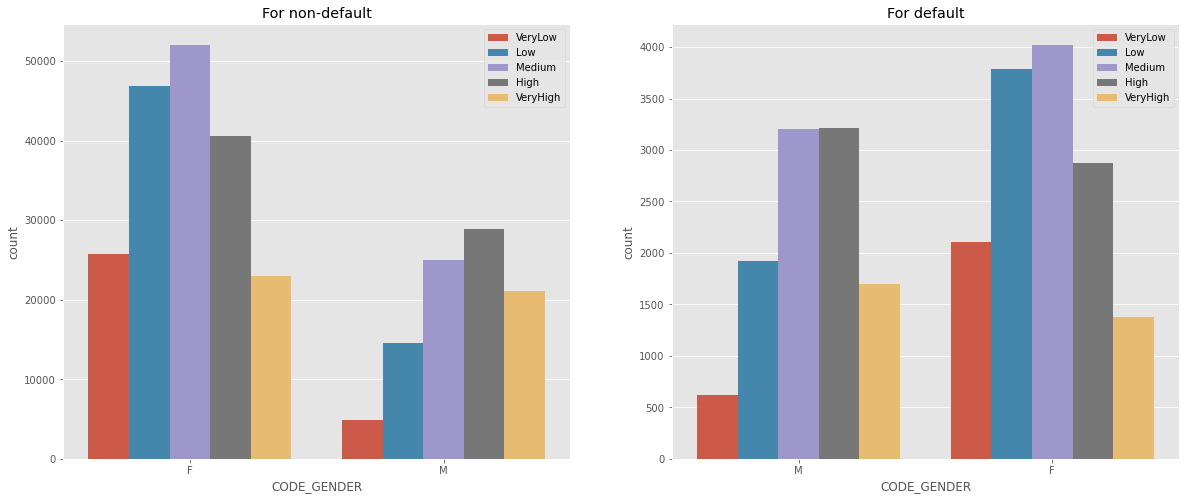

In [103]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=application_data_0,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('For non-default')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=application_data_1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('For default')
plt.legend(loc='upper right')
plt.show()

#### numerical- categorical bivariate analysis


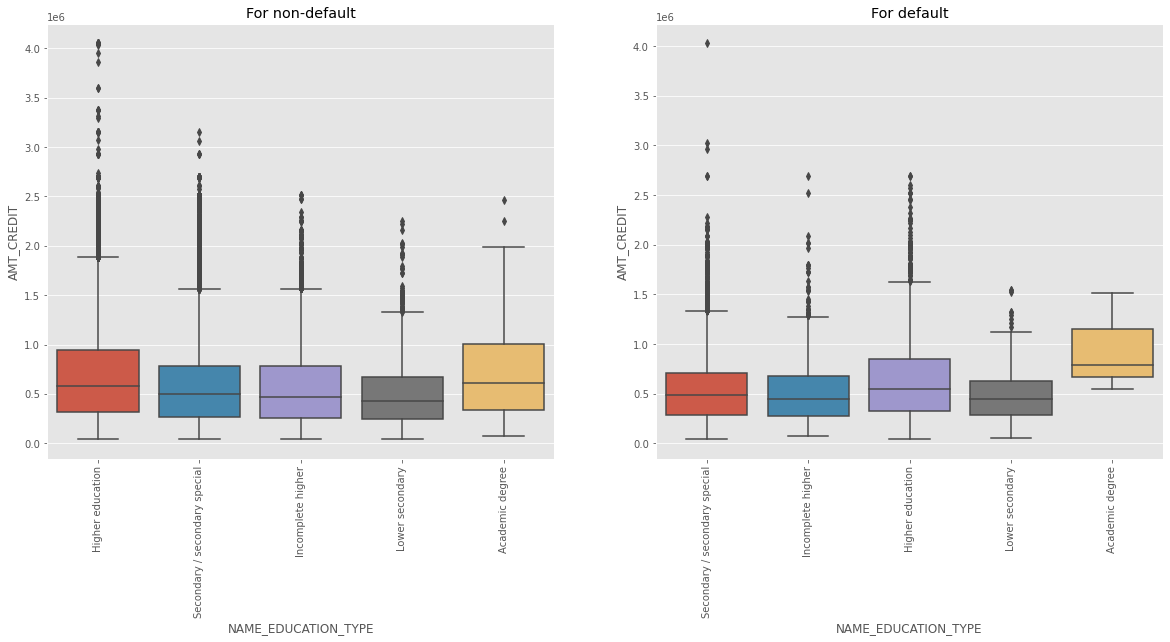

In [104]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=application_data_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('For non-default')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=application_data_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('For default')
plt.xticks(rotation=90)
plt.show()

Here we can see that the range of customers without payment of Academic degree is higher than the customer of with payment. And the rest of the Education type is almost same for both the cases.

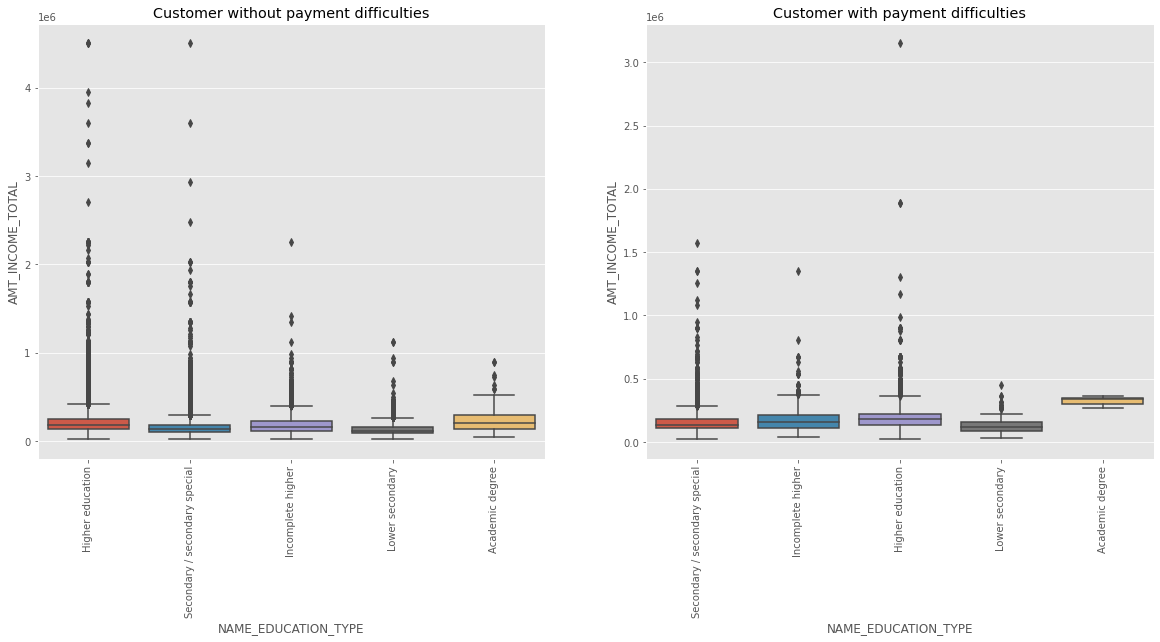

In [105]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=application_data_0[application_data_0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=application_data_1[application_data_1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Here we can see that the customers without payment is having more outliers as compare to the customer with payment.

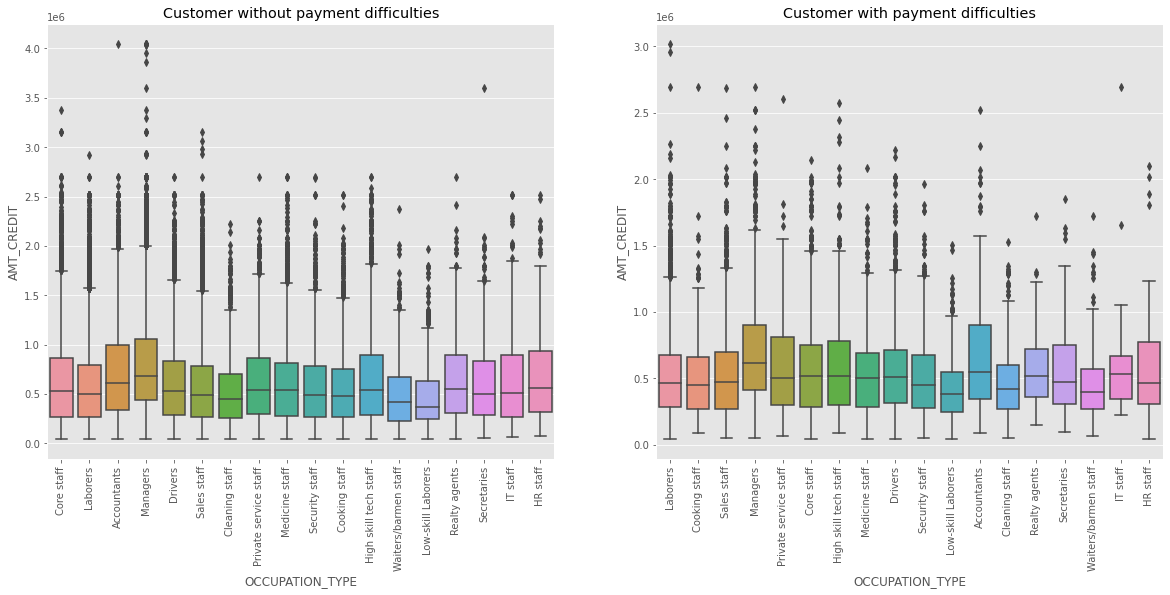

In [106]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=application_data_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=application_data_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Here we can see that the range of the customers without payment more as compare to the customers with payment.

### 7. Reading Previous application data

In [107]:
Previous_app_data= pd.read_csv(r"C:\Users\Harsh\Desktop\Surbhi\case study\Credit EDA Case Study-20210624T051525Z-001\Credit EDA Case Study\previous_application.csv")

In [108]:
Previous_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
Previous_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [110]:
Previous_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [111]:
# checking of missing values percentage

round((100*Previous_app_data.isnull().sum()/len(Previous_app_data)),2)



SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [112]:
# removing those columns which are having null percentage greater than 50
# AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 

Previous_app_data=Previous_app_data.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
Previous_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [113]:
# converting -ve values to +ve

Previous_app_data['DAYS_DECISION']= Previous_app_data['DAYS_DECISION'].abs()
Previous_app_data['SELLERPLACE_AREA']=Previous_app_data['SELLERPLACE_AREA'].abs()
Previous_app_data['DAYS_FIRST_DUE']=Previous_app_data['DAYS_FIRST_DUE'].abs()
Previous_app_data['DAYS_LAST_DUE_1ST_VERSION']=Previous_app_data['DAYS_LAST_DUE_1ST_VERSION'].abs()
Previous_app_data['DAYS_LAST_DUE']=Previous_app_data['DAYS_LAST_DUE'].abs()
Previous_app_data['DAYS_TERMINATION']=Previous_app_data['DAYS_TERMINATION'].abs()
Previous_app_data['DAYS_FIRST_DRAWING']=Previous_app_data['DAYS_FIRST_DRAWING'].abs()

In [114]:
Previous_app_data.head()



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# we will check the percentages of contract status

(round(100*Previous_app_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)),2)


(Approved        62.0
 Canceled        19.0
 Refused         17.0
 Unused offer     2.0
 Name: NAME_CONTRACT_STATUS, dtype: float64,
 2)

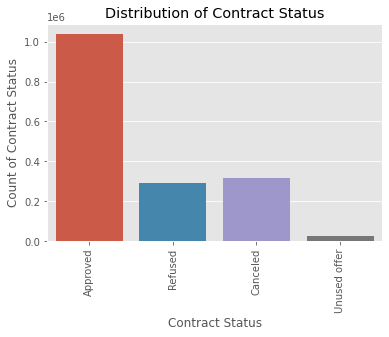

In [116]:
sns.countplot(Previous_app_data['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.xticks(rotation=90)
plt.title("Distribution of Contract Status")

plt.show()

### Merging application data and previous application data

Making a left join because we need all the rows in application data 
by making this left join we get historical application data for each applicant.
if we made a inner join we would loose the data of a new customer who doesn't have a previous record.
Current data will get duplicated the exact number of times it is found in previous application data.
with this in mind we are moving forward.



In [124]:
#left join

merged_app_data=pd.merge(application_data,Previous_app_data,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,Age_group,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Very_Young,LOW,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,Middle_Age,HIGH,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,Middle_Age,HIGH,2636178.0,Consumer l

### Univariate Analysis
 #### Categorical analysis


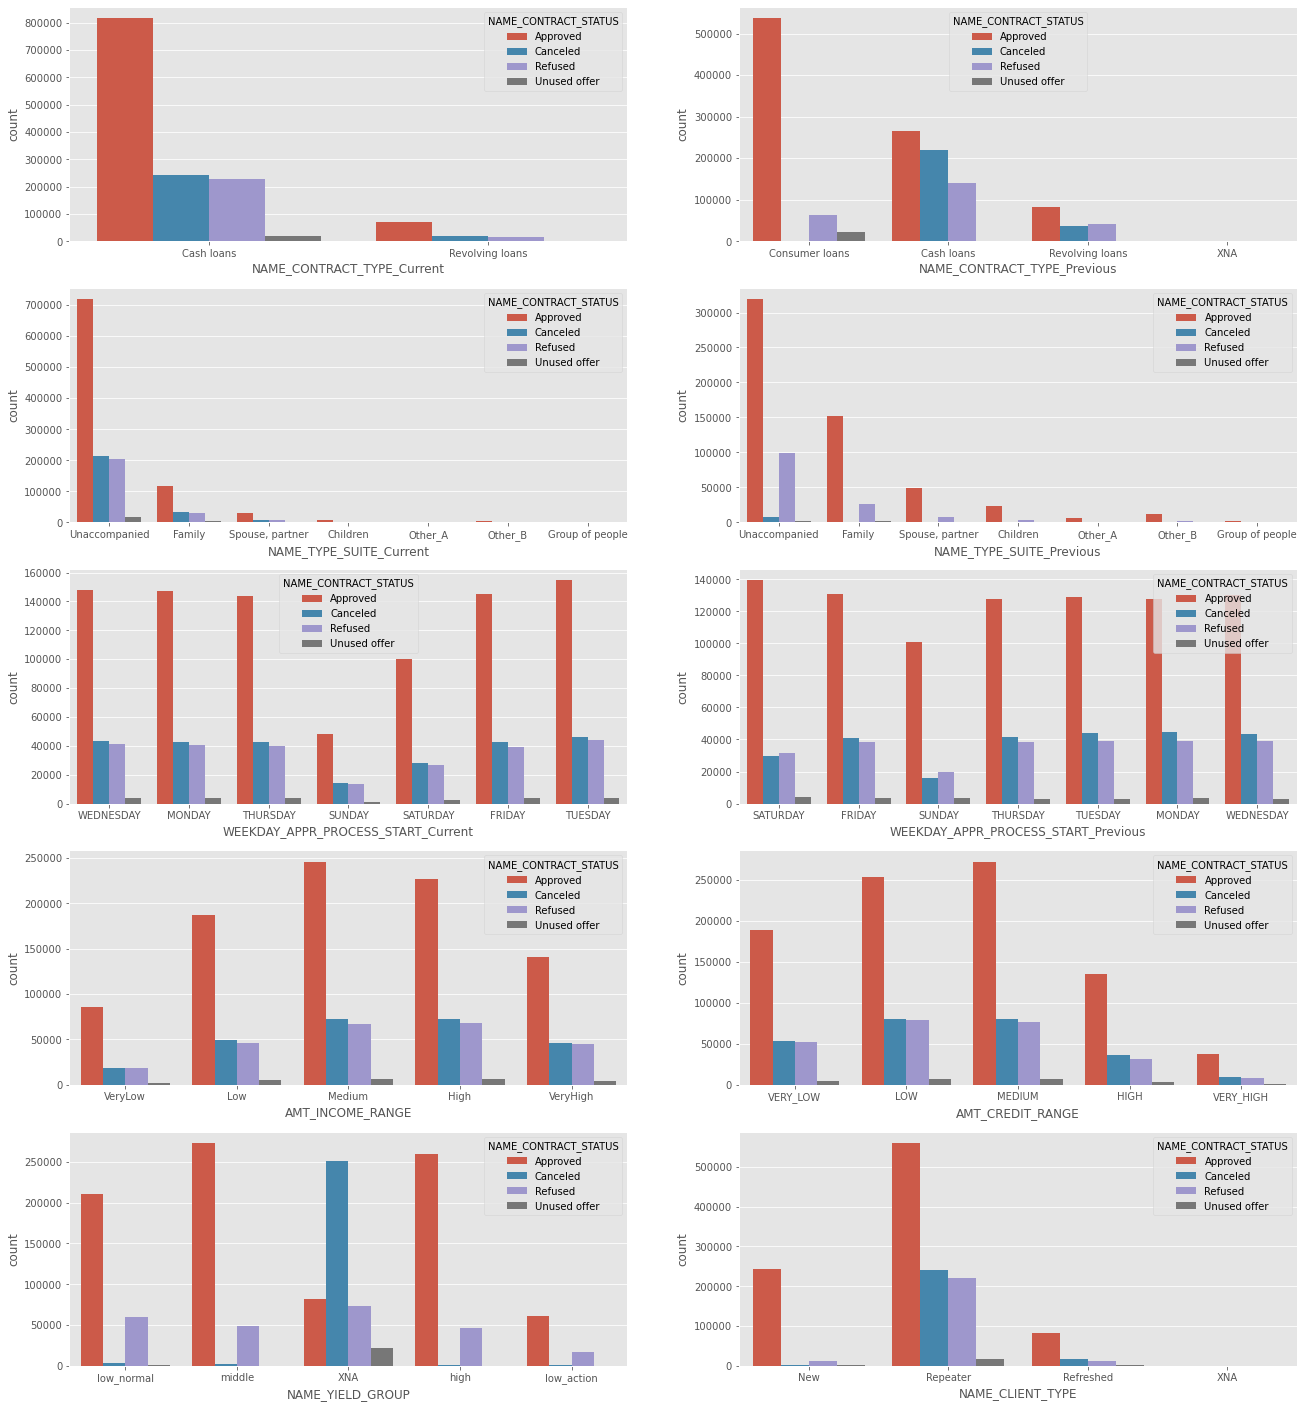

In [126]:
# Univariate Categorical analysis
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_RANGE','AMT_CREDIT_RANGE','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_app_data)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()


#### Insights
- Repeater has highest number of approved loans.
- Middle NAME_YIELD_GROUP has highest approval.
- Value of AMT_CREDIT_BIN does not affect loan approvals.
- for Medium AMT_INCOME_TOTAL_bin the approval is highest .
- in previous application saturday has the highest approval rate.
- but in current application it is tuesday.
- both in NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current unaccompanied has the highest number.
- currently bank is only giving two types of loans -Cash and Revolving Loans.
- Previously bank was providing Cash, Revolving and Consumer loans.
- Number of consumer loans were highest previously and now highest number is Cash loans.

#### Continous/Numerical analysis


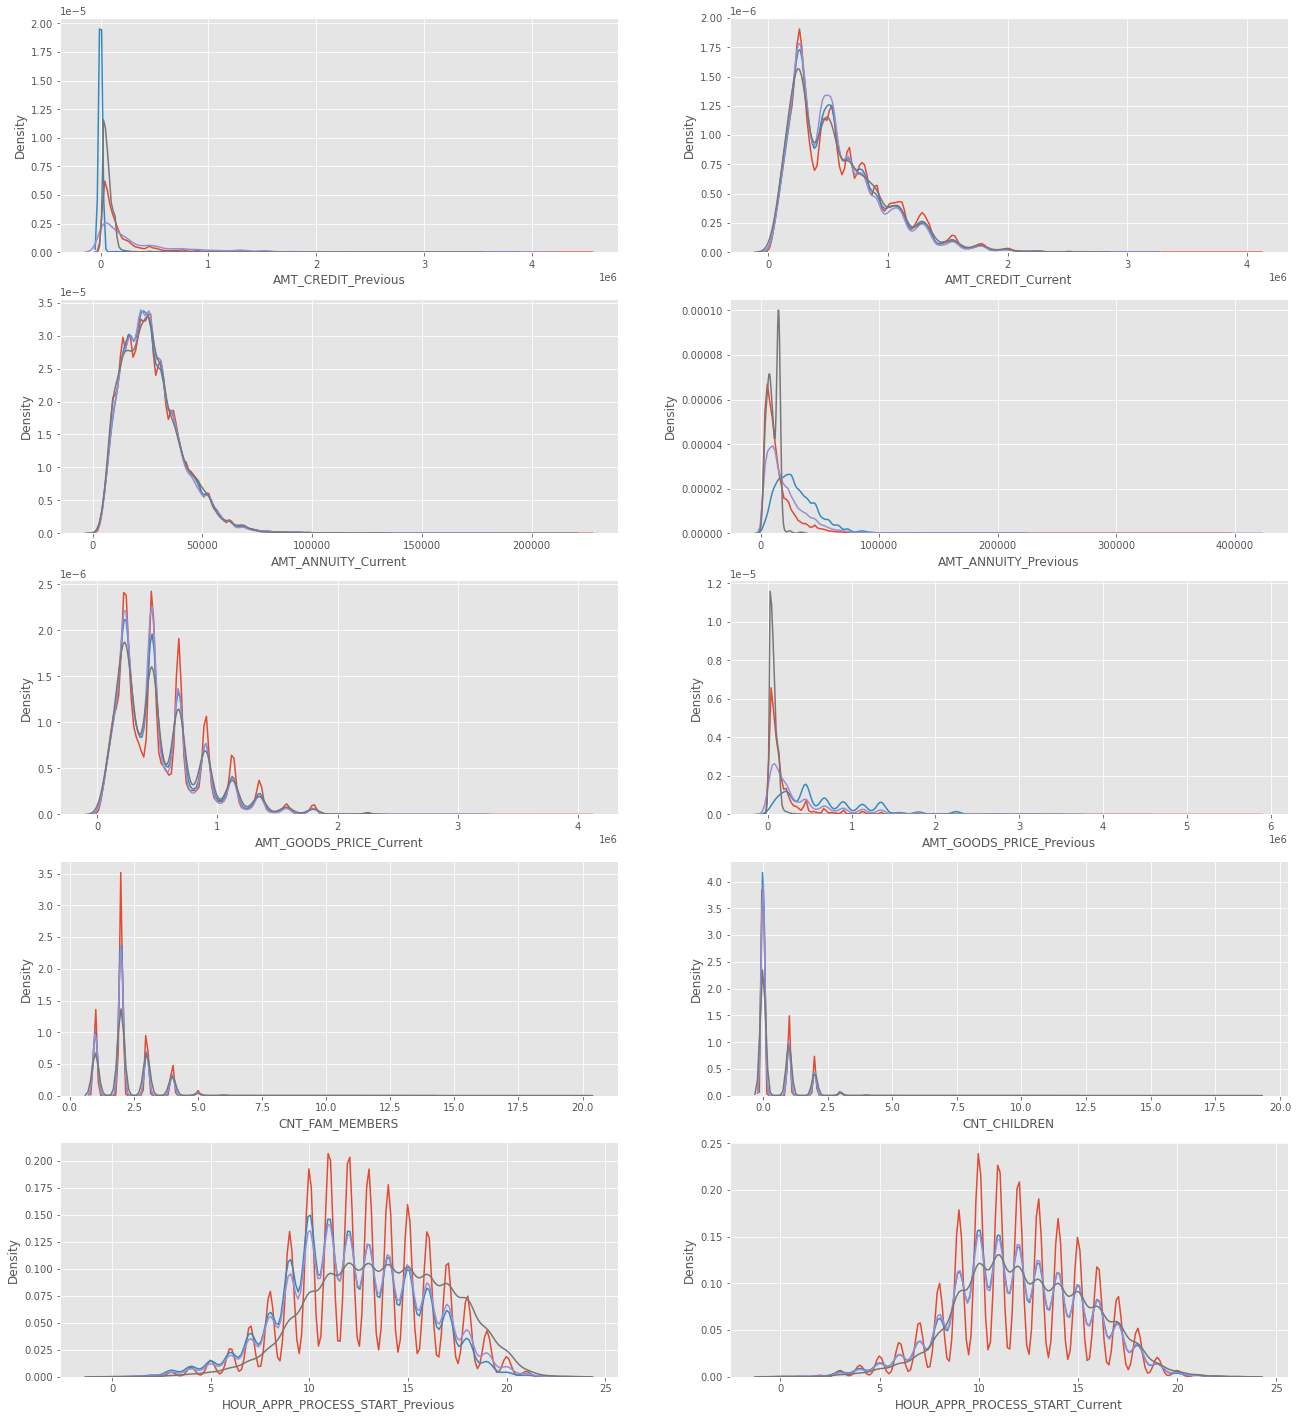

In [128]:
# Univariate Numerical analysis
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_app_data.loc[merged_app_data.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_app_data.loc[merged_app_data.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_app_data.loc[merged_app_data.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
   
# we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.

    sns.distplot(merged_app_data.loc[merged_app_data.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')

plt.show() 

#### Insights

As we can see from graphs

- High number of applications are filed in 9 AM to 2 PM for both Current and Previous data.
- So busiest hours for bank are form 9 AM to 2 PM.
- nuclear family tends to take more loans.
- Previously bank had high unused offers but currently refused is high incase of AMT_GOODS_PRICE.
- Previously bank had high unused offers and currently cancelled/refused offers are similar for AMT_ANNUITY.
- Previously bank had high unused offers and currently high number of refused offers for AMT_CREDIT.

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


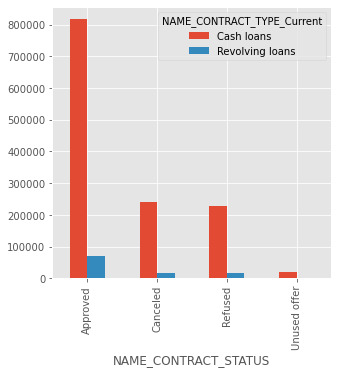

In [131]:
Data1 = pd.crosstab(index=merged_app_data['NAME_CONTRACT_STATUS'],columns=merged_app_data['NAME_CONTRACT_TYPE_Current'])
print(Data1)
Data1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
#Cash loans have the highest count of Approved loans

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


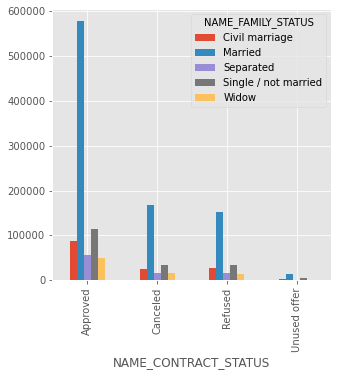

In [132]:
Data2= pd.crosstab(index=merged_app_data['NAME_CONTRACT_STATUS'],columns=merged_app_data['NAME_FAMILY_STATUS'])
print(Data2)
Data2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Married applicant

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791667                33138   
Canceled                          629             234120                 9149   
Refused                           659             219301                 8544   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


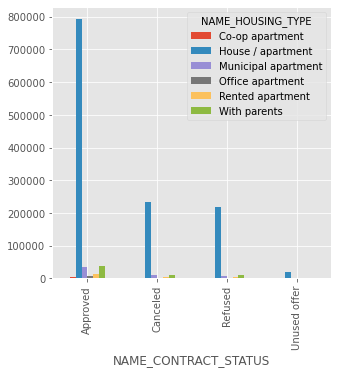

In [133]:
Data3= pd.crosstab(index=merged_app_data['NAME_CONTRACT_STATUS'],columns=merged_app_data['NAME_HOUSING_TYPE'])
print(Data3)
Data3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for House/apartment owner.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266381          537310            82408    0
Canceled                         220383            1329            37445  284
Refused                          139568           64282            41511   29
Unused offer                        432           22335                4    0


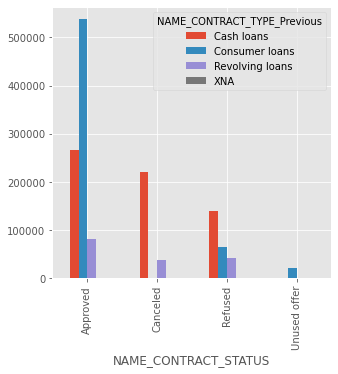

In [134]:
Data4= pd.crosstab(index=merged_app_data['NAME_CONTRACT_STATUS'],columns=merged_app_data['NAME_CONTRACT_TYPE_Previous'])
print(Data4)
Data4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Consumer Loans.

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


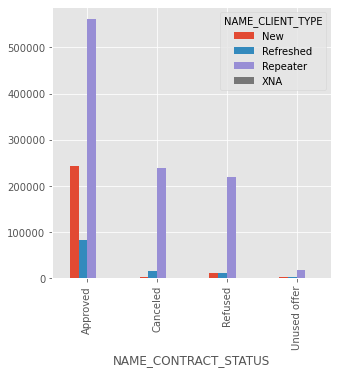

In [135]:
Data5= pd.crosstab(index=merged_app_data['NAME_CONTRACT_STATUS'],columns=merged_app_data['NAME_CLIENT_TYPE'])
print(Data5)
Data5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# repeated applications got approved most number of times

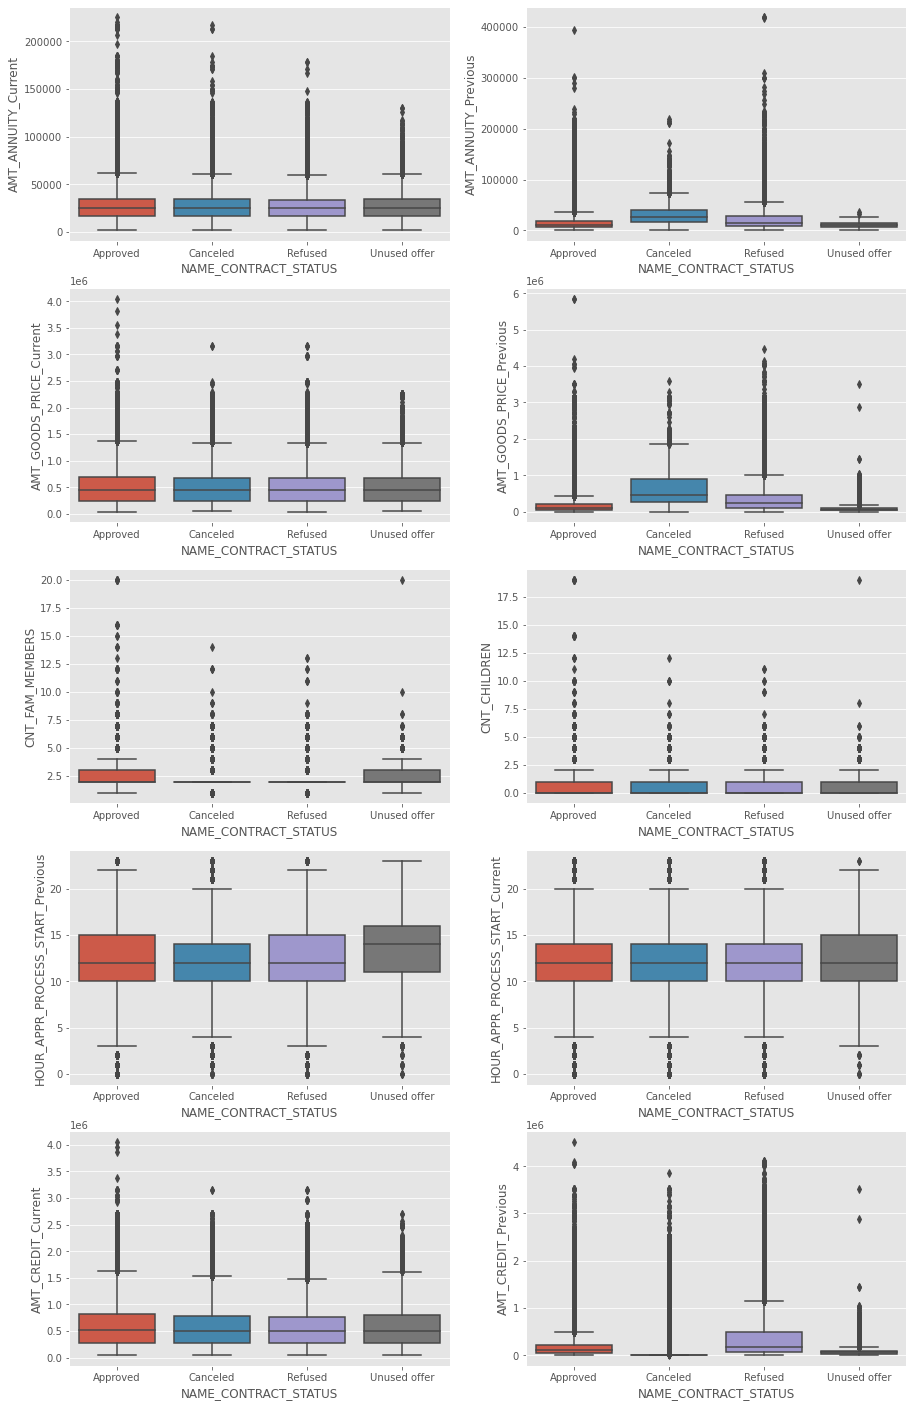

In [136]:
#Bi-variate continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                   #'AMT_INCOME_TOTAL']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_app_data[i[1]].dropna(),data=merged_app_data)
plt.show() 

#### Insights
- AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.
- time spent in unused offer is higher as compared to other categories.
- So bank should reduce time spent on unused offer.
- nuclear family(2-3 people in family) get highest approval.
- Previously most of the applications were cancelled or refused
- but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_GOODS_PRICE.
- Previously most of the applications were cancelled or refused
- but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_ANNUITY.

### 8. Final Words
Target/focused variable for Application dataset - TARGET
Target/focused variable for Previous dataset - NAME_CONTRACT_STATUS

Top Major variables to consider for loan prediction:

NAME_EDUCATION_TYPE
AMT_INCOME_TOTAL
DAYS_BIRTH
AMT_CREDIT
DAYS_EMPLOYED
AMT_ANNUITY
NAME_INCOME_TYPE
CODE_GENDER
NAME_HOUSING_TYPE
The above mentioned variables are to be considered before approving application to minimize risk of loss.